### 1) loading the dataset

In [1]:
limit_length=128
batch_size= 32
d_model = 40
load_from_backup = False
val_same_as_train = True

early_stopping_activated = False
half_period_cycle = 5
early_stop_thresh = 3*half_period_cycle
nb_epochs = 300


base_lr = 0.00001
max_lr = 0.001
momentum=0.9

restore_from_backup = ["model_params","model_inputs"]

In [2]:
from translation_machine import dataset_mod,sentence_mod

import numpy as np
import torch

language_info = torch.load("../../models/language_info.pth")

vocab_french = language_info["french"]["vocab"]
vocab_english = language_info["english"]["vocab"]

max_length_french = language_info["french"]["max_sentence_train_val"]
max_length_english = language_info["english"]["max_sentence_train_val"]


whole_dataset = dataset_mod.DatasetFromTxt("../../data/french_english_dataset/fra.txt",limit_length=limit_length)


In [3]:

whole_dataset = list(dataset_mod.SentenceDataSet(whole_dataset,sentence_type_src=sentence_mod.EnglishSentence,sentence_type_dst=sentence_mod.FrenchSentence))

# Remark : the responsability to split the dataset is done outside of this notebook

idxs_train = np.load("../../dataset_splitting/idx_train.npy")
idxs_val = np.load("../../dataset_splitting/idx_val.npy")
idxs_test = np.load("../../dataset_splitting/idx_test.npy")

idxs_train,idxs_val,idxs_test = [[idx for idx in idxs if idx<len(whole_dataset)] for idxs in [idxs_train,idxs_val,idxs_test]]
train_dataset = torch.utils.data.Subset(whole_dataset,idxs_train)
val_dataset = torch.utils.data.Subset(whole_dataset,idxs_val)
test_dataset = torch.utils.data.Subset(whole_dataset,idxs_test)

### 2) creation the vocabulary

In [4]:
from translation_machine import collate_fn_mod

import torch
from torch.utils.data import DataLoader
import numpy as np

collate_fn = collate_fn_mod.get_collate_fn(max_length_english,max_length_french)


train_data_loader = DataLoader(train_dataset,batch_size=batch_size,shuffle=True,collate_fn=collate_fn)
val_data_loader = DataLoader(val_dataset,batch_size=batch_size,shuffle=True,collate_fn=collate_fn)

if val_same_as_train:
    val_data_loader = train_data_loader

In [5]:
len(vocab_french.vocab.itos_),len(vocab_english.vocab.itos_)

(5407, 4076)

In [6]:
from translation_machine.models import transformer_mod



model_inputs = {
    "d_model":d_model,
    "vocab_src":sentence_mod.EnglishSentence.vocab,
    "vocab_tgt":sentence_mod.FrenchSentence.vocab,
}

model = transformer_mod.TransformerForSeq2Seq(**model_inputs)


In [7]:
from torch import optim
from translation_machine import model_trainer

from torch import nn
from torch import nn
baseline_loss = nn.CrossEntropyLoss(reduction="sum")


optimizer = torch.optim.SGD(model.parameters(), lr=base_lr, momentum=momentum)
scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer,step_size_up=half_period_cycle , base_lr=base_lr, max_lr=max_lr)
model_trainer = model_trainer.ModelTrainer(model,optimizer,scheduler,train_data_loader,val_data_loader,baseline_loss)


In [8]:
from tqdm import tqdm
model.train()
losses = {"train":[],"val":[]}
metrics = {"train":[],"val":[]}


In [9]:
from pathlib import Path
import torch
path_model_and_dependencies = "../../models/sequence_translator_transformer_over_fitted.pth"

if load_from_backup and Path(path_model_and_dependencies).exists():
    back_up = torch.load(path_model_and_dependencies)
    for el1,el2 in zip([model,scheduler,optimizer,scheduler,losses,metrics],
                      ["model_params","scheduler","optimizer","losses","metrics"]):
        if el2 in restore_from_backup:
            el1.load_state_dict(back_up[el2])
    
    print("model loaded")

  0%|                                                                             | 0/300 [00:00<?, ?it/s]

optimizing for epoch 0
training_step
0 8.508314629562763
validation_step
0 8.248343075022978
saving for epoch 0


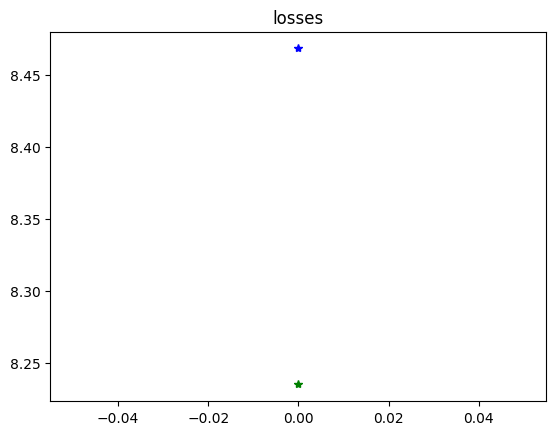

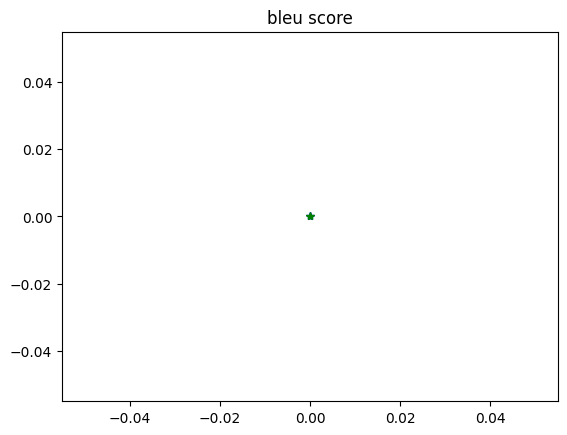

  0%|▏                                                                    | 1/300 [00:09<48:46,  9.79s/it]

9.787216663360596
optimizing for epoch 1
training_step
0 8.270102500915527
validation_step
0 6.814366340637207
saving for epoch 1


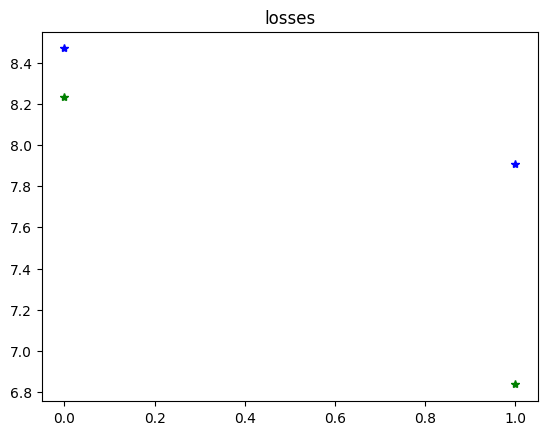

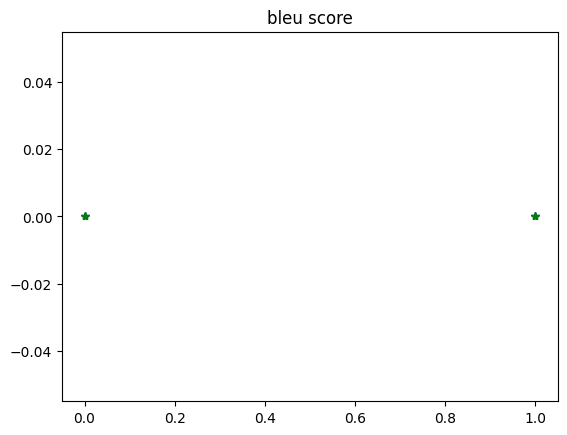

  1%|▍                                                                    | 2/300 [00:17<41:54,  8.44s/it]

7.49151349067688
optimizing for epoch 2
training_step
0 6.746483283314278
validation_step
0 6.238873201258042
saving for epoch 2


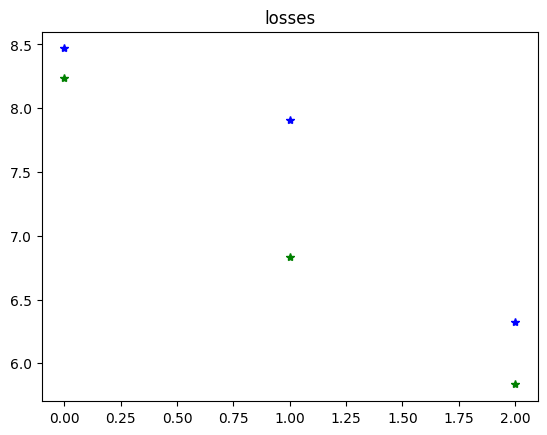

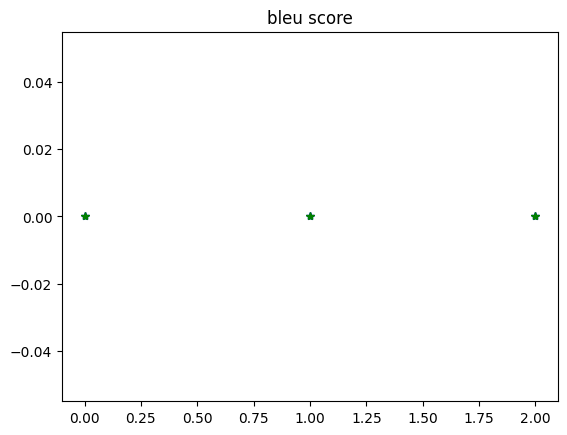

  1%|▋                                                                    | 3/300 [00:24<40:00,  8.08s/it]

7.657325029373169
optimizing for epoch 3
training_step
0 6.075936453683036
validation_step
0 5.519168682952426
saving for epoch 3


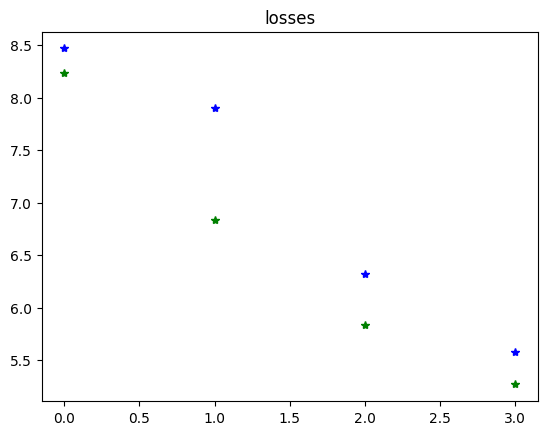

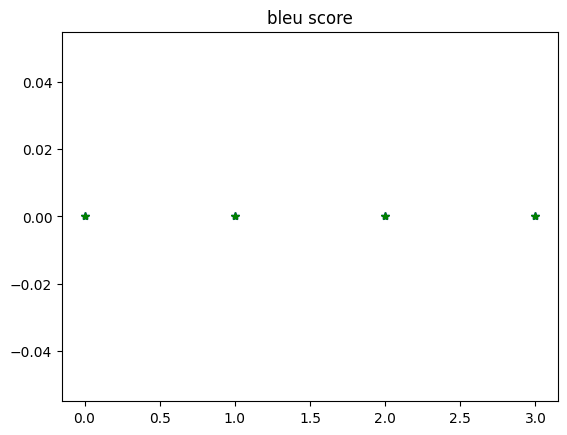

  1%|▉                                                                    | 4/300 [00:32<38:52,  7.88s/it]

7.566768646240234
optimizing for epoch 4
training_step
0 5.34448486328125
validation_step
0 5.036746025085449
saving for epoch 4


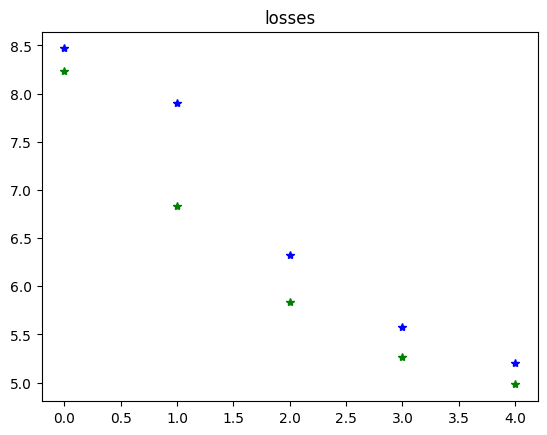

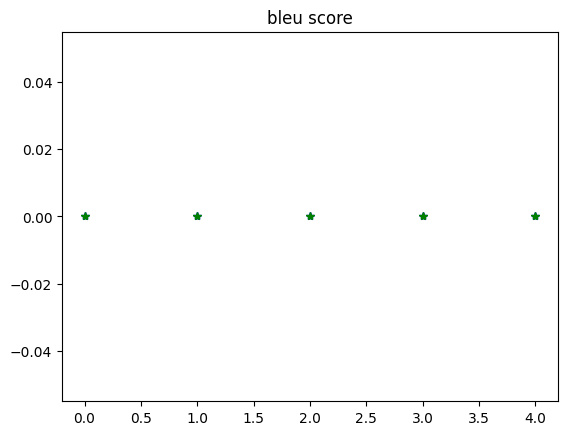

  2%|█▏                                                                   | 5/300 [00:40<38:13,  7.78s/it]

7.590851545333862
optimizing for epoch 5
training_step
0 4.993178367614746
validation_step
0 4.6158544921875
saving for epoch 5


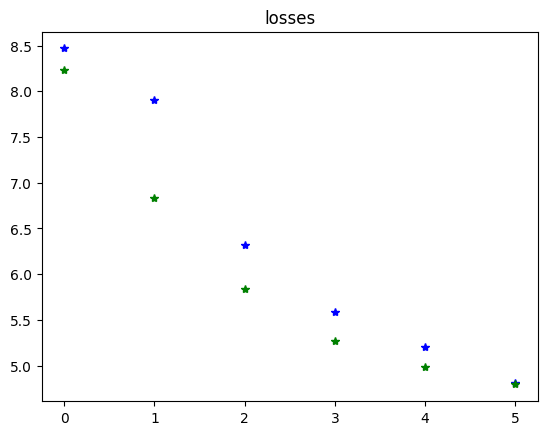

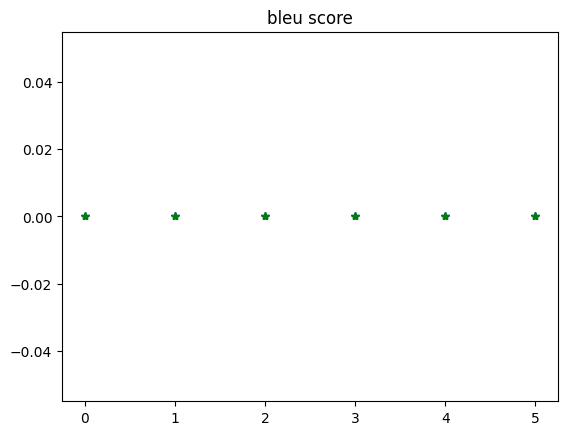

  2%|█▍                                                                   | 6/300 [00:47<37:37,  7.68s/it]

7.493201017379761
optimizing for epoch 6
training_step
0 4.633184617565524
validation_step
0 4.687558807595803
saving for epoch 6


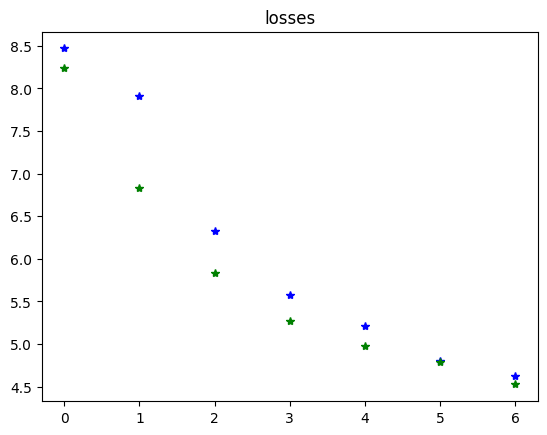

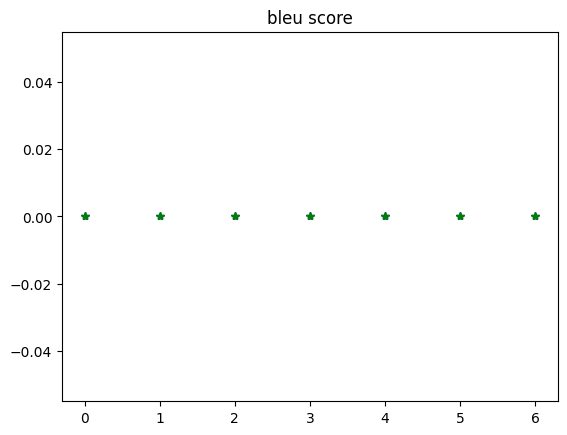

  2%|█▌                                                                   | 7/300 [00:55<37:26,  7.67s/it]

7.641360521316528
optimizing for epoch 7
training_step
0 4.460384245841734
validation_step
0 4.096698098931431
saving for epoch 7


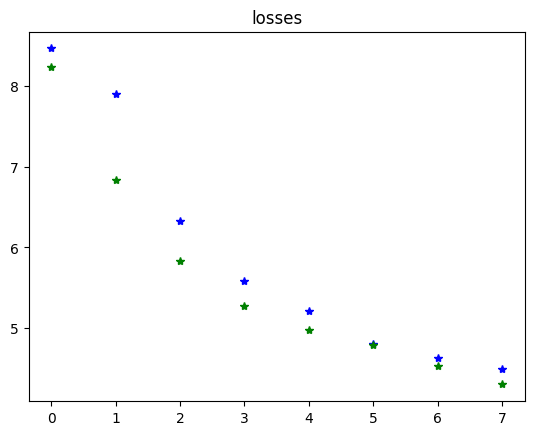

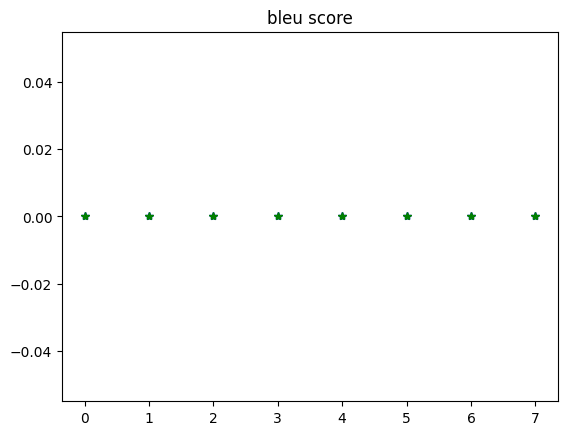

  3%|█▊                                                                   | 8/300 [01:02<37:01,  7.61s/it]

7.477332353591919
optimizing for epoch 8
training_step
0 4.402654254247272
validation_step
0 3.9897029399871826
saving for epoch 8


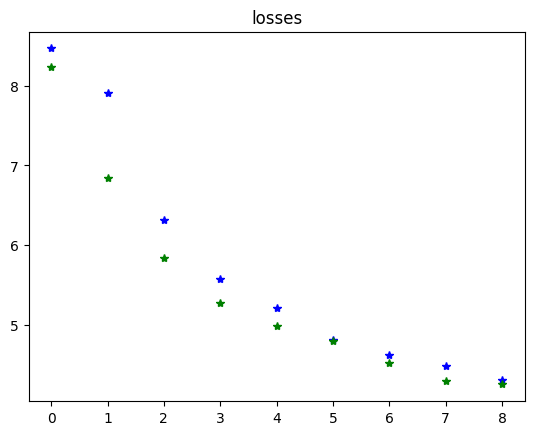

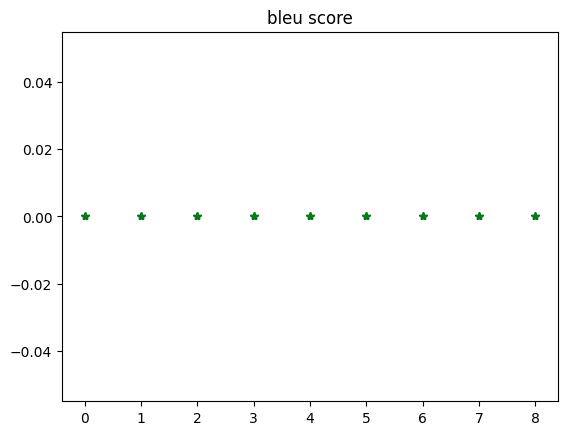

  3%|██                                                                   | 9/300 [01:10<36:58,  7.62s/it]

7.658858299255371
optimizing for epoch 9
training_step
0 4.258373930254056
validation_step
0 4.163525390625
saving for epoch 9


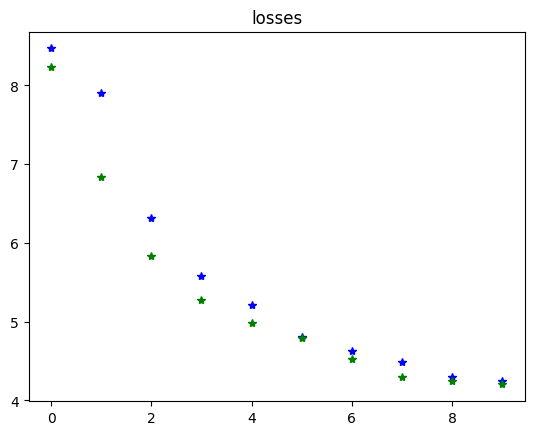

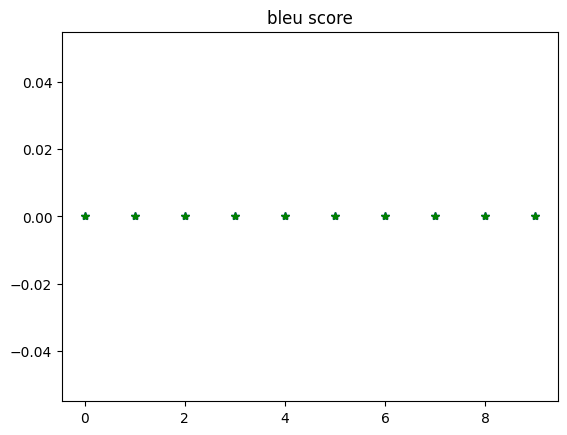

  3%|██▎                                                                 | 10/300 [01:17<36:41,  7.59s/it]

7.515194654464722
optimizing for epoch 10
training_step
0 4.19219830927958
validation_step
0 4.394745113342766
saving for epoch 10


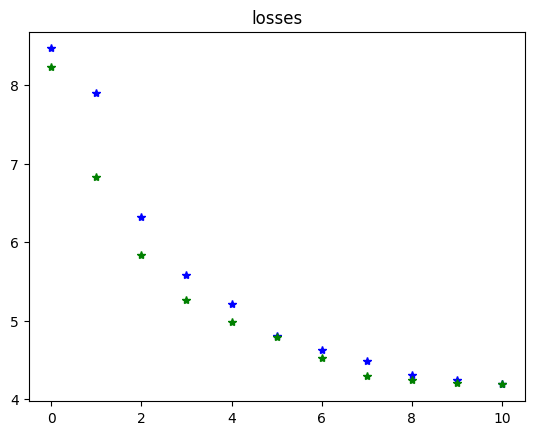

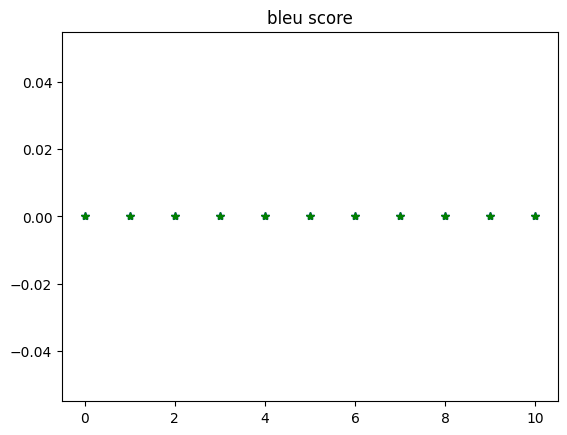

  4%|██▍                                                                 | 11/300 [01:25<36:35,  7.60s/it]

7.6076014041900635
optimizing for epoch 11
training_step
0 4.2367267030658144
validation_step
0 4.367862731453002
saving for epoch 11


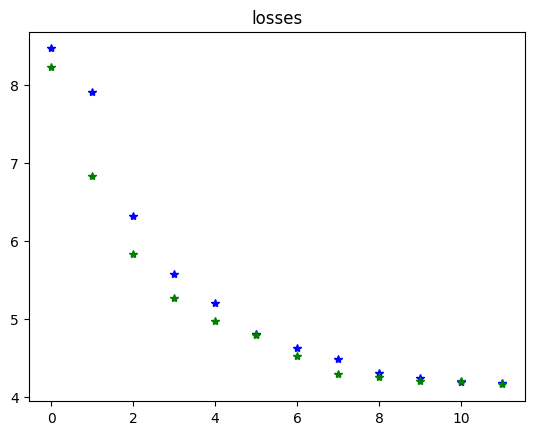

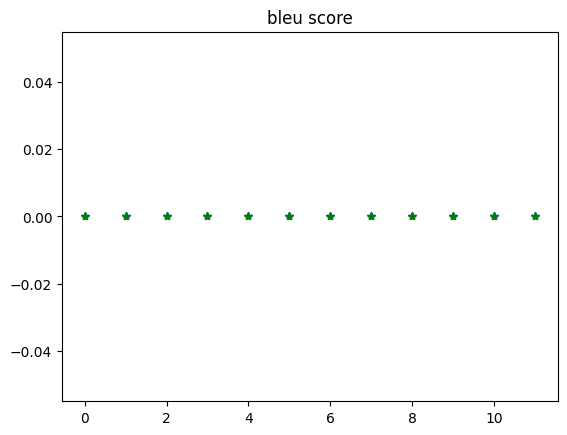

  4%|██▋                                                                 | 12/300 [01:33<36:31,  7.61s/it]

7.63850212097168
optimizing for epoch 12
training_step
0 4.0754714473601314
validation_step
0 4.3957538026751894
saving for epoch 12


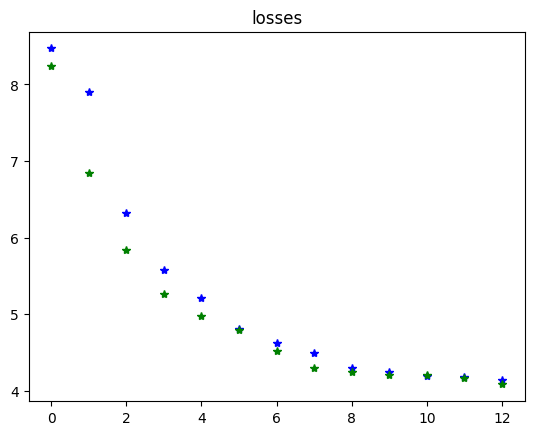

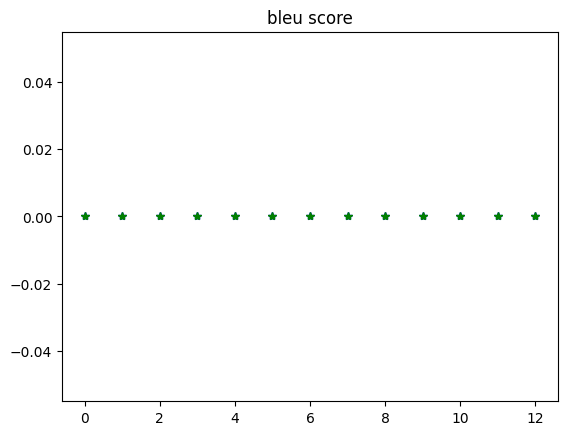

  4%|██▉                                                                 | 13/300 [01:40<36:17,  7.59s/it]

7.534054279327393
optimizing for epoch 13
training_step
0 4.269681104973181
validation_step
0 3.6726391800050813
saving for epoch 13


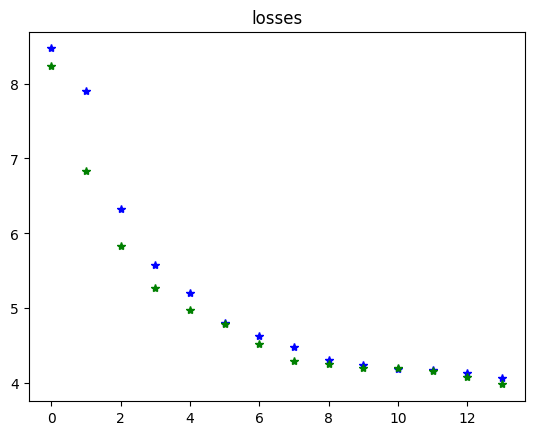

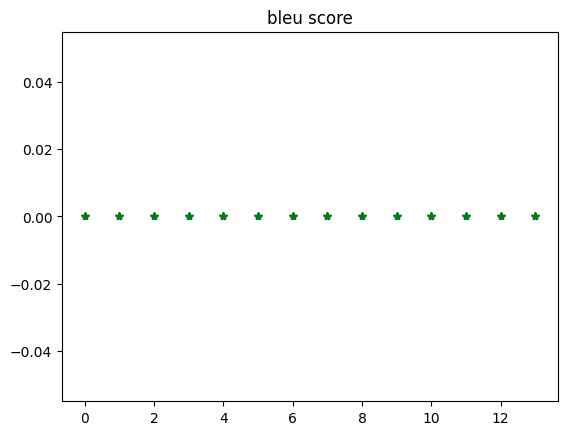

  5%|███▏                                                                | 14/300 [01:48<36:09,  7.59s/it]

7.581815242767334
optimizing for epoch 14
training_step
0 3.9646536020132213
validation_step
0 3.8268781046229083
saving for epoch 14


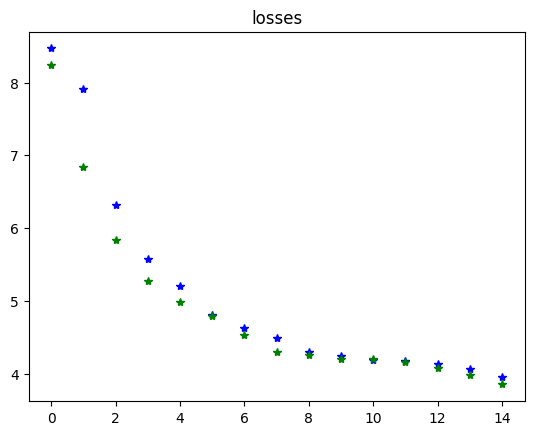

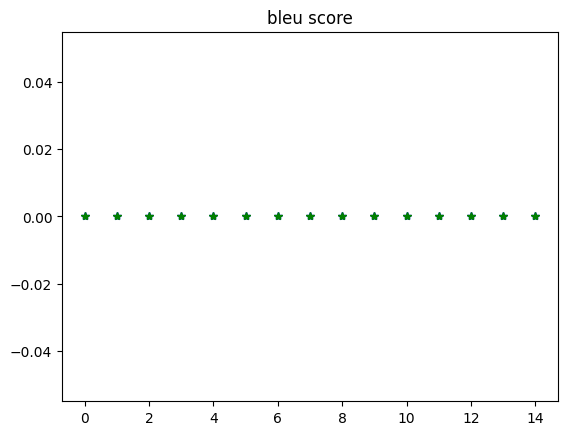

  5%|███▍                                                                | 15/300 [01:55<35:58,  7.58s/it]

7.547060012817383
optimizing for epoch 15
training_step
0 3.815601110458374
validation_step
0 3.743434061530892
saving for epoch 15


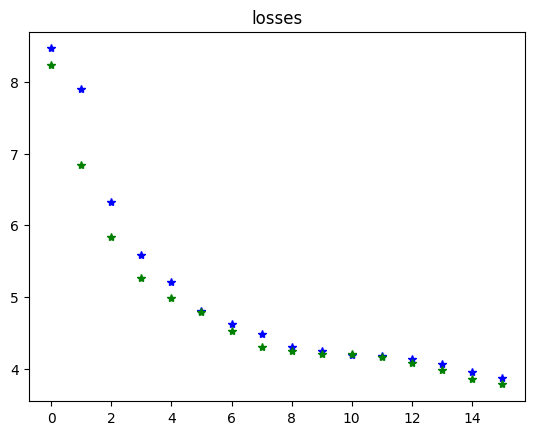

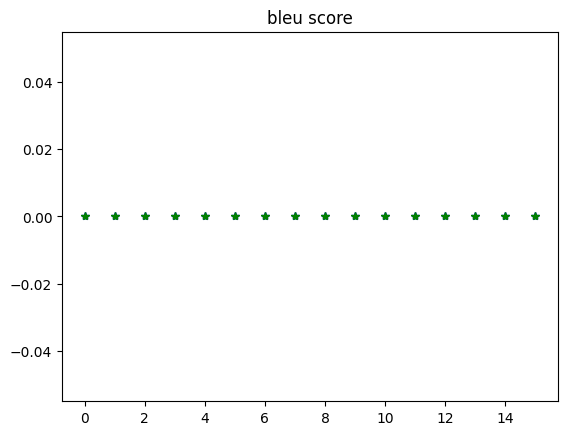

  5%|███▋                                                                | 16/300 [02:03<35:57,  7.60s/it]

7.64924955368042
optimizing for epoch 16
training_step
0 3.6901078444260818
validation_step
0 3.704324722290039
saving for epoch 16


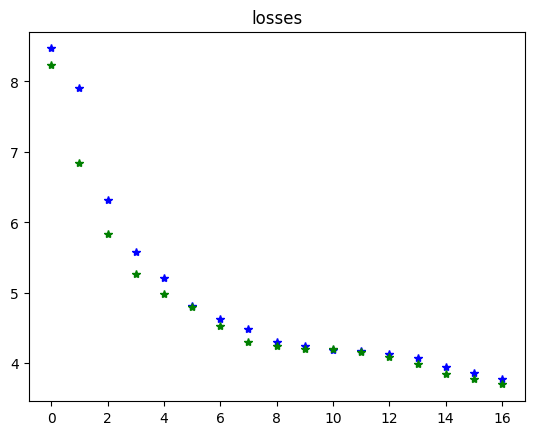

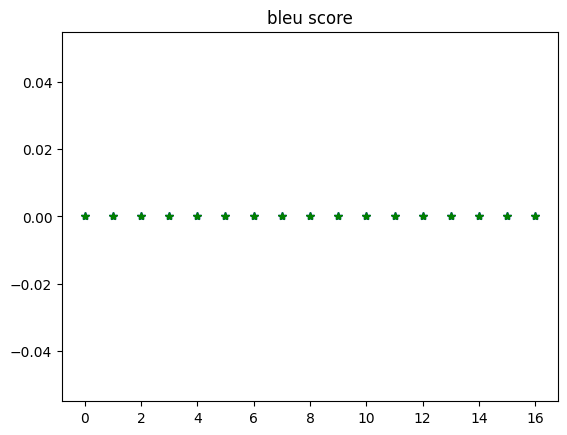

  6%|███▊                                                                | 17/300 [02:11<35:45,  7.58s/it]

7.537429332733154
optimizing for epoch 17
training_step
0 3.6279776436941966
validation_step
0 3.4506667222433944
saving for epoch 17


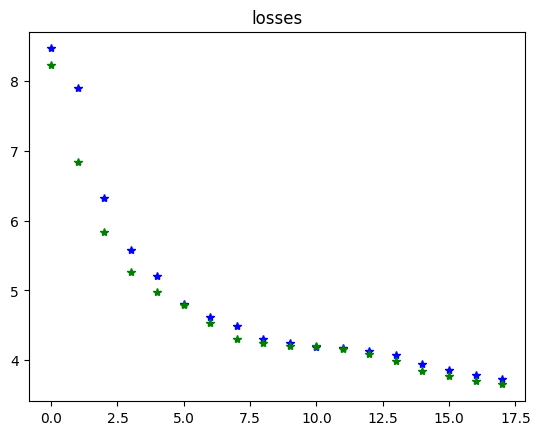

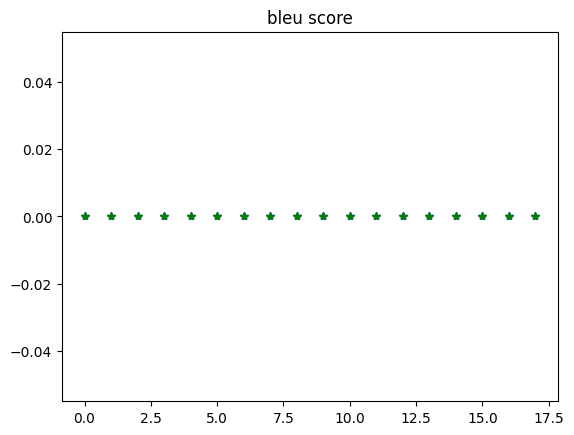

  6%|████                                                                | 18/300 [02:18<35:42,  7.60s/it]

7.6399126052856445
optimizing for epoch 18
training_step
0 3.433651069972826
validation_step
0 3.663074464726269
saving for epoch 18


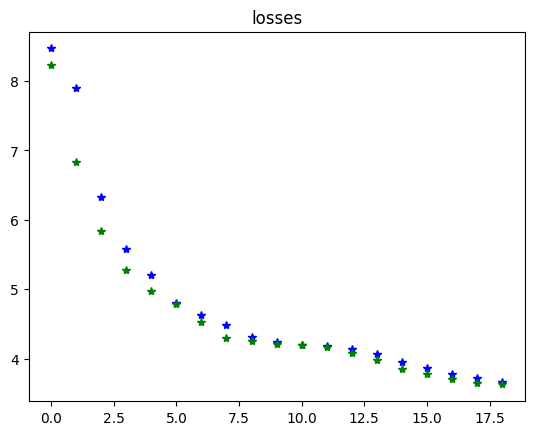

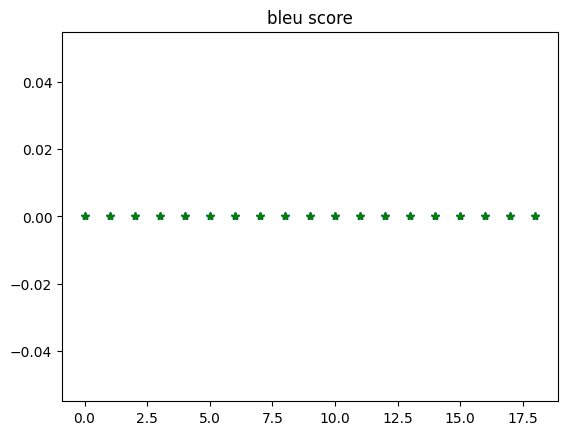

  6%|████▎                                                               | 19/300 [02:26<35:30,  7.58s/it]

7.538894891738892
optimizing for epoch 19
training_step
0 3.6915191890686514
validation_step
0 3.6077052525111606
saving for epoch 19


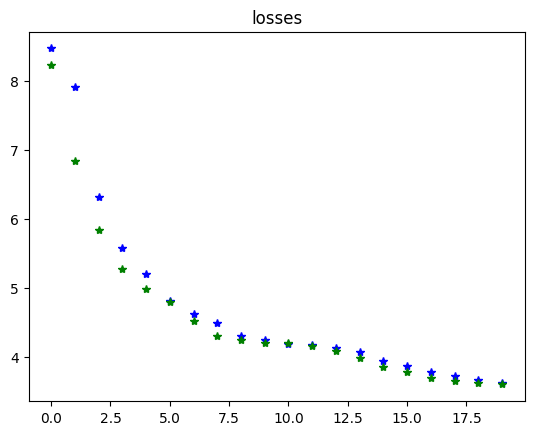

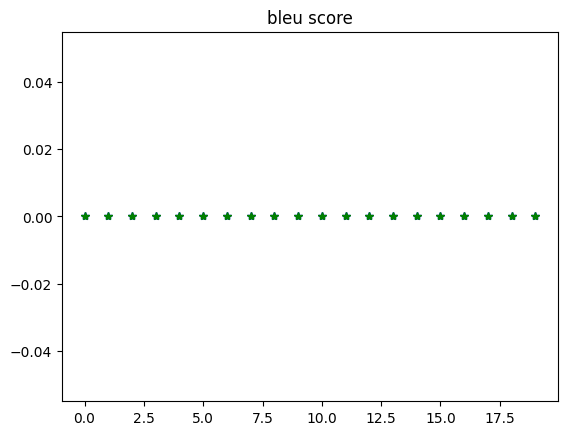

  7%|████▌                                                               | 20/300 [02:33<35:17,  7.56s/it]

7.521624803543091
optimizing for epoch 20
training_step
0 3.5716694157298017
validation_step
0 3.3633265177408855
saving for epoch 20


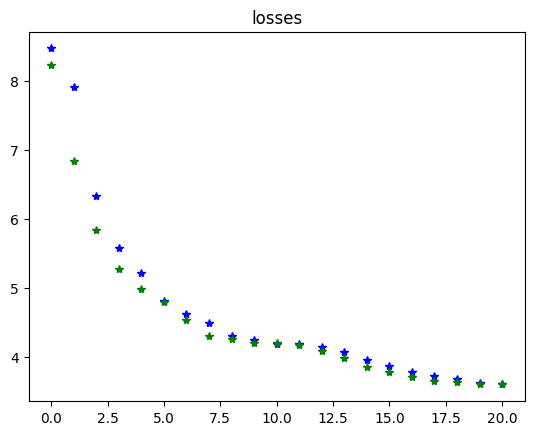

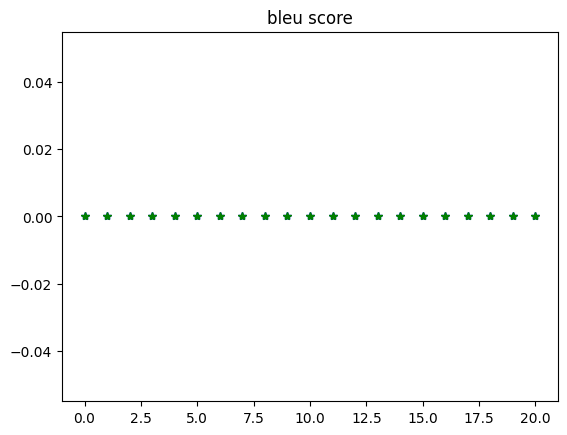

  7%|████▊                                                               | 21/300 [02:41<35:05,  7.55s/it]

7.500876426696777
optimizing for epoch 21
training_step
0 3.522730936530892
validation_step
0 3.6410730642865796
saving for epoch 21


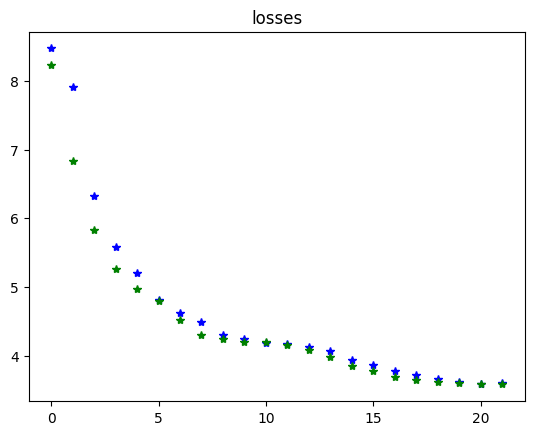

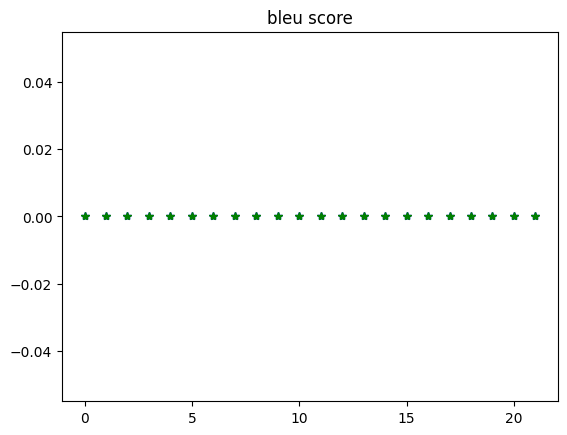

  7%|████▉                                                               | 22/300 [02:48<34:55,  7.54s/it]

7.521098613739014
optimizing for epoch 22
training_step
0 3.5320235851199127
validation_step
0 3.596588134765625
saving for epoch 22


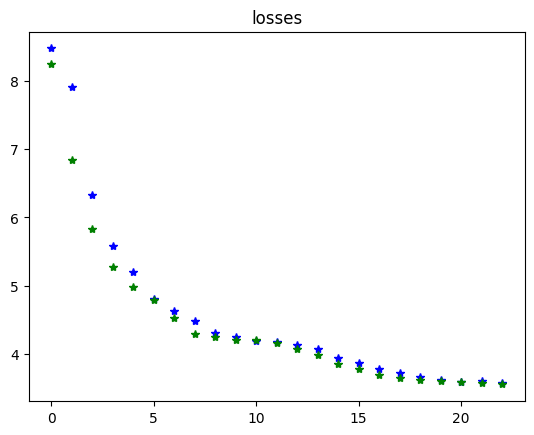

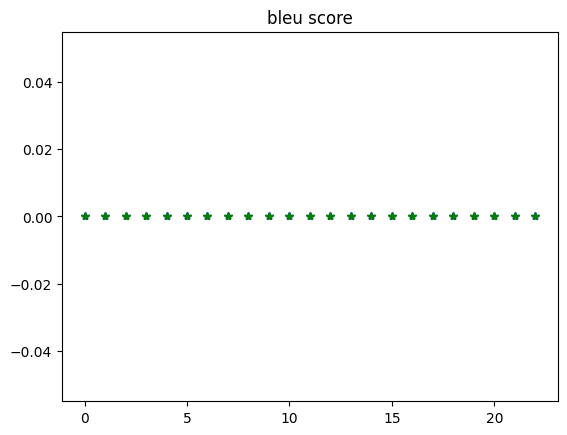

  8%|█████▏                                                              | 23/300 [02:56<34:49,  7.54s/it]

7.55705451965332
optimizing for epoch 23
training_step
0 3.804777493442062
validation_step
0 3.5355003110824095
saving for epoch 23


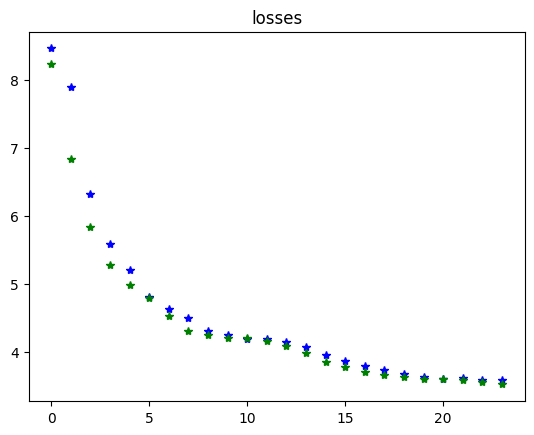

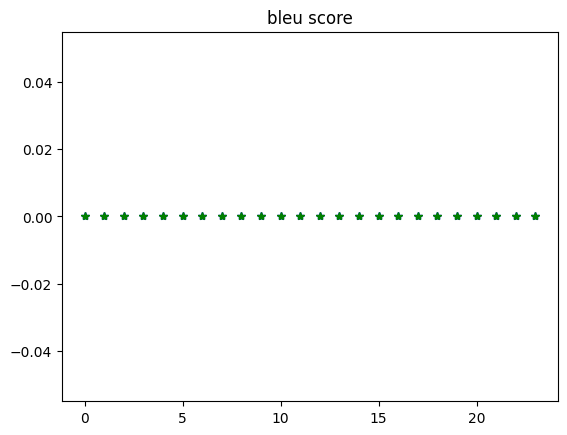

  8%|█████▍                                                              | 24/300 [03:03<34:35,  7.52s/it]

7.4578001499176025
optimizing for epoch 24
training_step
0 3.563816258164703
validation_step
0 3.5493466835322343


  8%|█████▋                                                              | 25/300 [03:10<33:44,  7.36s/it]

6.991655349731445
optimizing for epoch 25
training_step
0 3.7383063017432367
validation_step
0 3.8359920471672


  9%|█████▉                                                              | 26/300 [03:17<33:11,  7.27s/it]

7.048274278640747
optimizing for epoch 26
training_step
0 3.7335652516300515
validation_step
0 3.670652560102261


  9%|██████                                                              | 27/300 [03:24<32:44,  7.20s/it]

7.024232625961304
optimizing for epoch 27
training_step
0 3.772497025747148
validation_step
0 3.4757943559986675
saving for epoch 27


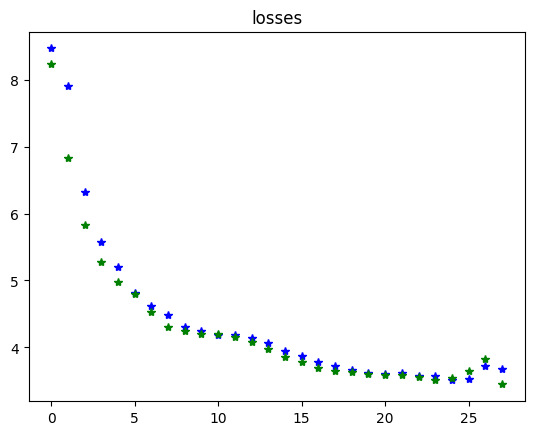

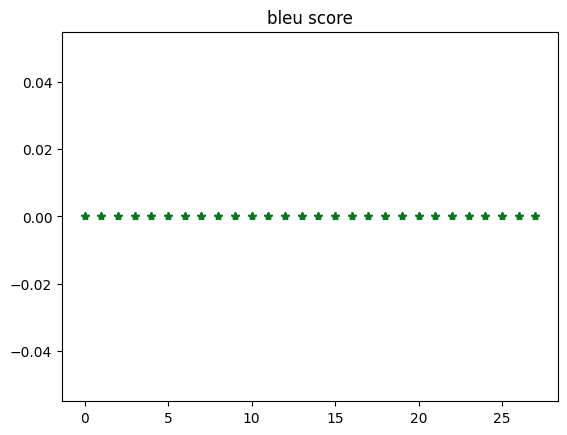

  9%|██████▎                                                             | 28/300 [03:32<33:05,  7.30s/it]

7.540435552597046
optimizing for epoch 28
training_step
0 3.29783349609375
validation_step
0 3.36875048828125
saving for epoch 28


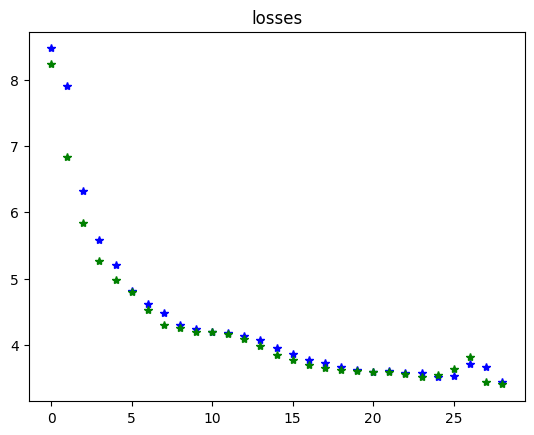

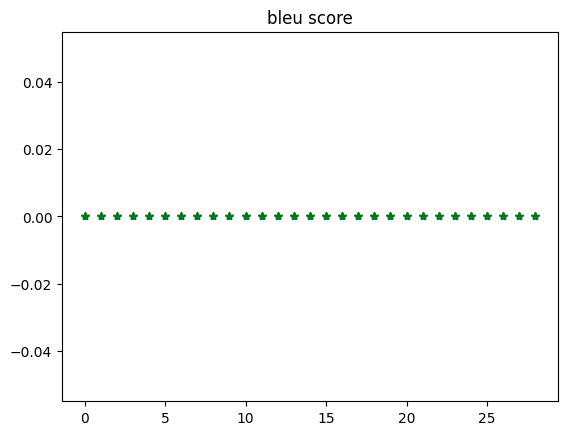

 10%|██████▌                                                             | 29/300 [03:39<33:24,  7.40s/it]

7.61298942565918
optimizing for epoch 29
training_step
0 3.3513113706166506
validation_step
0 3.4738422740589487
saving for epoch 29


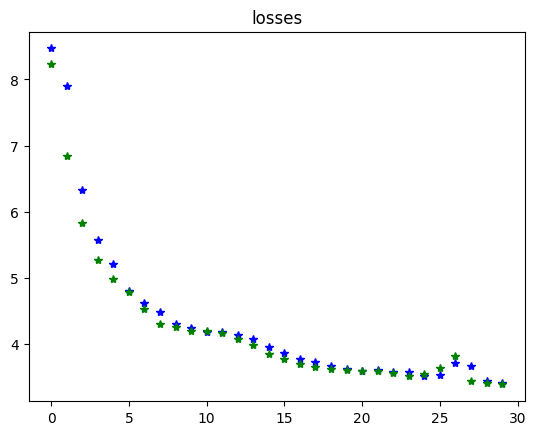

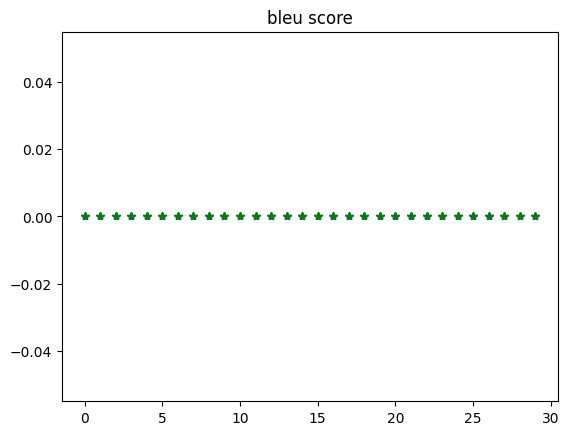

 10%|██████▊                                                             | 30/300 [03:47<33:23,  7.42s/it]

7.478583812713623
optimizing for epoch 30
training_step
0 3.4570394035514074
validation_step
0 3.399724365234375
saving for epoch 30


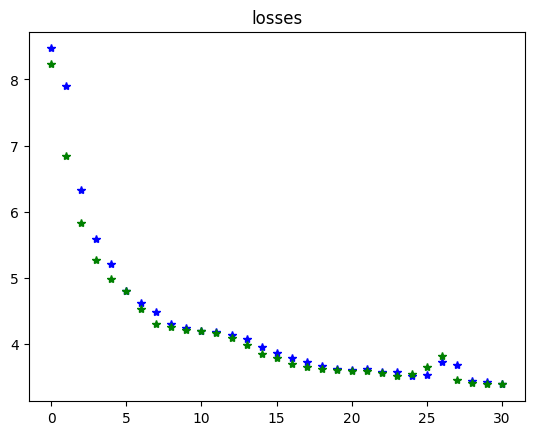

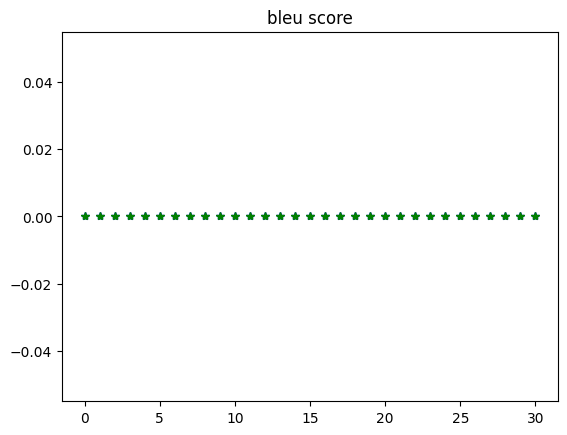

 10%|███████                                                             | 31/300 [03:54<33:20,  7.44s/it]

7.470701694488525
optimizing for epoch 31
training_step
0 3.4119325594137644
validation_step
0 3.3451739934485727
saving for epoch 31


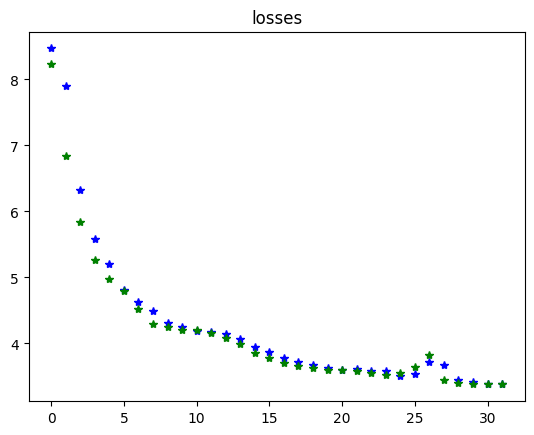

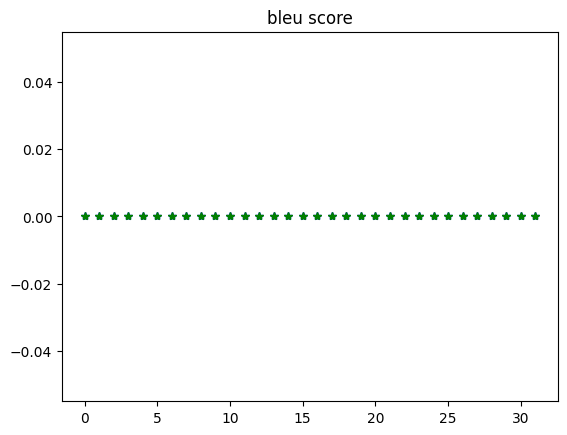

 11%|███████▎                                                            | 32/300 [04:02<33:22,  7.47s/it]

7.556138038635254
optimizing for epoch 32
training_step
0 3.4798912635216346
validation_step
0 3.2829020023345947
saving for epoch 32


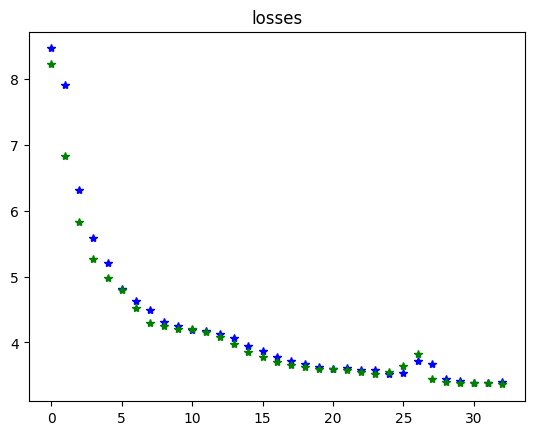

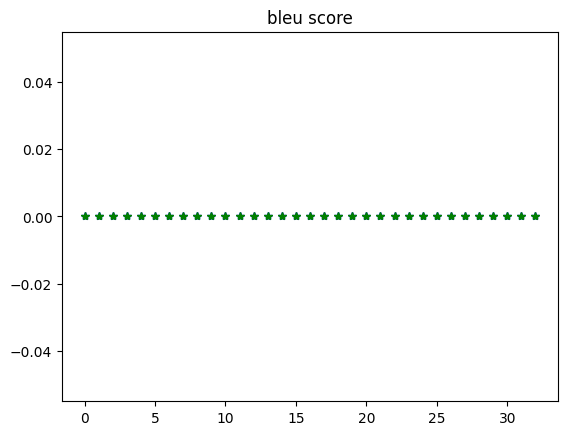

 11%|███████▍                                                            | 33/300 [04:10<33:18,  7.49s/it]

7.516383409500122
optimizing for epoch 33
training_step
0 3.51478271484375
validation_step
0 3.383502339207849


 11%|███████▋                                                            | 34/300 [04:17<32:33,  7.34s/it]

7.00864577293396
optimizing for epoch 34
training_step
0 3.4065873117157905
validation_step
0 3.2495389302571613


 12%|███████▉                                                            | 35/300 [04:24<31:58,  7.24s/it]

6.995625257492065
optimizing for epoch 35
training_step
0 3.5258697965251864
validation_step
0 3.686623640886442


 12%|████████▏                                                           | 36/300 [04:31<31:36,  7.18s/it]

7.04724907875061
optimizing for epoch 36
training_step
0 3.6316048758370534
validation_step
0 3.98789245124877


 12%|████████▍                                                           | 37/300 [04:38<31:24,  7.17s/it]

7.12557053565979
optimizing for epoch 37
training_step
0 4.012233904938199
validation_step
0 4.056581453512643


 13%|████████▌                                                           | 38/300 [04:45<31:10,  7.14s/it]

7.066654205322266
optimizing for epoch 38
training_step
0 4.270813860212054
validation_step
0 3.9319187567486025


 13%|████████▊                                                           | 39/300 [04:52<30:58,  7.12s/it]

7.078015565872192
optimizing for epoch 39
training_step
0 3.7917996361142112
validation_step
0 3.543794420030382


 13%|█████████                                                           | 40/300 [04:59<30:40,  7.08s/it]

6.983499765396118
optimizing for epoch 40
training_step
0 3.4881589536313657
validation_step
0 3.5716748419608777


 14%|█████████▎                                                          | 41/300 [05:06<30:31,  7.07s/it]

7.0474278926849365
optimizing for epoch 41
training_step
0 3.333154693851626
validation_step
0 3.8483238220214844


 14%|█████████▌                                                          | 42/300 [05:13<30:20,  7.06s/it]

7.020914793014526
optimizing for epoch 42
training_step
0 3.799280121570497
validation_step
0 3.428244282880167


 14%|█████████▋                                                          | 43/300 [05:20<30:14,  7.06s/it]

7.057166337966919
optimizing for epoch 43
training_step
0 3.564647579981276
validation_step
0 3.6840104411419174


 15%|█████████▉                                                          | 44/300 [05:27<30:05,  7.05s/it]

7.02872633934021
optimizing for epoch 44
training_step
0 3.7746296903512775
validation_step
0 3.2993984961694527


 15%|██████████▏                                                         | 45/300 [05:34<29:52,  7.03s/it]

6.977832555770874
optimizing for epoch 45
training_step
0 3.3915792325647867
validation_step
0 3.632057076069846


 15%|██████████▍                                                         | 46/300 [05:41<29:41,  7.01s/it]

6.973845720291138
optimizing for epoch 46
training_step
0 3.472984666090745
validation_step
0 3.539314561217796


 16%|██████████▋                                                         | 47/300 [05:48<29:35,  7.02s/it]

7.028823137283325
optimizing for epoch 47
training_step
0 3.4715622932680192
validation_step
0 3.39445155120093


 16%|██████████▉                                                         | 48/300 [05:55<29:28,  7.02s/it]

7.011004209518433
optimizing for epoch 48
training_step
0 3.3321240432863313
validation_step
0 3.3632363984079072


 16%|███████████                                                         | 49/300 [06:02<29:17,  7.00s/it]

6.966660499572754
optimizing for epoch 49
training_step
0 3.485483417074189
validation_step
0 3.1531049092610677


 17%|███████████▎                                                        | 50/300 [06:09<29:08,  6.99s/it]

6.9698286056518555
optimizing for epoch 50
training_step
0 3.4287320650540867
validation_step
0 3.5368959849117365


 17%|███████████▌                                                        | 51/300 [06:16<29:04,  7.01s/it]

7.034933090209961
optimizing for epoch 51
training_step
0 3.3339746756147046
validation_step
0 3.4671123046875


 17%|███████████▊                                                        | 52/300 [06:23<28:58,  7.01s/it]

7.009629487991333
optimizing for epoch 52
training_step
0 3.640158719794695
validation_step
0 3.553583296518477


 18%|████████████                                                        | 53/300 [06:30<28:50,  7.00s/it]

6.989460468292236
optimizing for epoch 53
training_step
0 3.607031770454821
validation_step
0 3.6338182627725946


 18%|████████████▏                                                       | 54/300 [06:37<28:40,  6.99s/it]

6.9669859409332275
optimizing for epoch 54
training_step
0 3.288098848783053
validation_step
0 3.5536967270246897


 18%|████████████▍                                                       | 55/300 [06:44<28:32,  6.99s/it]

6.971423864364624
optimizing for epoch 55
training_step
0 3.491065740585327
validation_step
0 3.39263916015625


 19%|████████████▋                                                       | 56/300 [06:51<28:22,  6.98s/it]

6.9523375034332275
optimizing for epoch 56
training_step
0 3.654102956216166
validation_step
0 3.4282618931361606


 19%|████████████▉                                                       | 57/300 [06:58<28:15,  6.98s/it]

6.972818613052368
optimizing for epoch 57
training_step
0 3.339416748046875
validation_step
0 3.4183601500496033


 19%|█████████████▏                                                      | 58/300 [07:05<28:12,  6.99s/it]

7.02558159828186
optimizing for epoch 58
training_step
0 3.441750933033551
validation_step
0 3.144694095900079


 20%|█████████████▎                                                      | 59/300 [07:12<28:05,  6.99s/it]

6.985773324966431
optimizing for epoch 59
training_step
0 3.5984157476210057
validation_step
0 3.4676169193152226


 20%|█████████████▌                                                      | 60/300 [07:19<27:58,  6.99s/it]

6.995826721191406
optimizing for epoch 60
training_step
0 3.442911463459646
validation_step
0 3.3904542922973633


 20%|█████████████▊                                                      | 61/300 [07:26<27:55,  7.01s/it]

7.044765472412109
optimizing for epoch 61
training_step
0 3.21816015625
validation_step
0 3.4562505677688953


 21%|██████████████                                                      | 62/300 [07:33<27:45,  7.00s/it]

6.9738709926605225
optimizing for epoch 62
training_step
0 3.638180045194404
validation_step
0 3.7448957038648203


 21%|██████████████▎                                                     | 63/300 [07:40<27:37,  6.99s/it]

6.979944467544556
optimizing for epoch 63
training_step
0 3.6917791892224407
validation_step
0 3.38737060546875


 21%|██████████████▌                                                     | 64/300 [07:47<27:31,  7.00s/it]

7.007316589355469
optimizing for epoch 64
training_step
0 3.2940592127522144
validation_step
0 3.6027325665509258


 22%|██████████████▋                                                     | 65/300 [07:54<27:25,  7.00s/it]

7.00272274017334
optimizing for epoch 65
training_step
0 3.6569957005158638
validation_step
0 3.4799774632309424


 22%|██████████████▉                                                     | 66/300 [08:01<27:21,  7.02s/it]

7.05082631111145
optimizing for epoch 66
training_step
0 3.3512260623094514
validation_step
0 3.332947015762329
saving for epoch 66


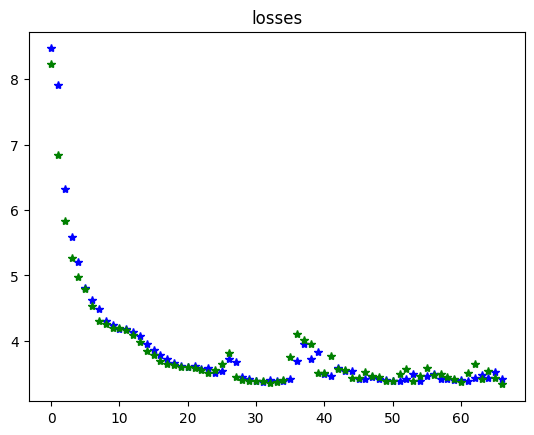

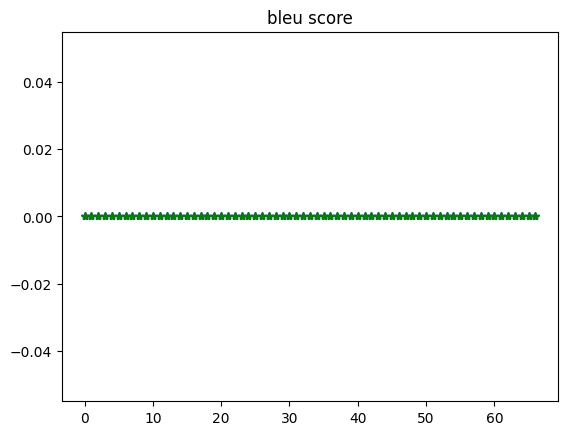

 22%|███████████████▏                                                    | 67/300 [08:08<27:50,  7.17s/it]

7.524306058883667
optimizing for epoch 67
training_step
0 3.3209164142608643
validation_step
0 3.2493782648964533


 23%|███████████████▍                                                    | 68/300 [08:16<27:33,  7.13s/it]

7.024265766143799
optimizing for epoch 68
training_step
0 3.2683691009273375
validation_step
0 3.3038707342673472


 23%|███████████████▋                                                    | 69/300 [08:23<27:20,  7.10s/it]

7.036853790283203
optimizing for epoch 69
training_step
0 3.384694737712229
validation_step
0 3.3116166591644287
saving for epoch 69


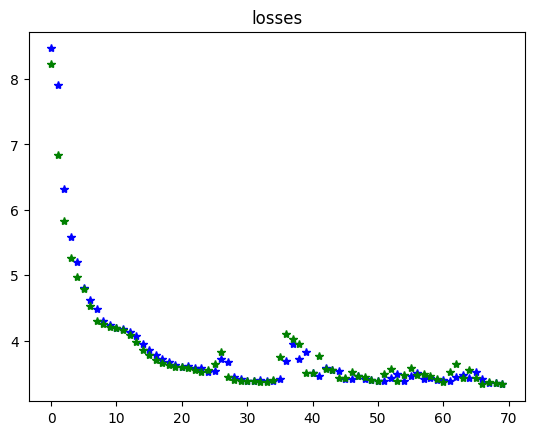

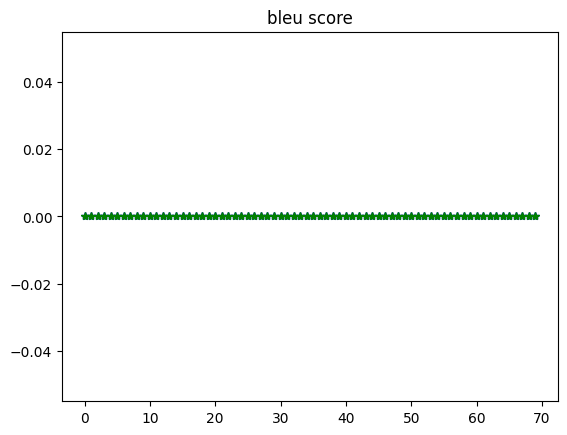

 23%|███████████████▊                                                    | 70/300 [08:30<27:40,  7.22s/it]

7.498203754425049
optimizing for epoch 70
training_step
0 3.4951931473112454
validation_step
0 3.3672847891212405
saving for epoch 70


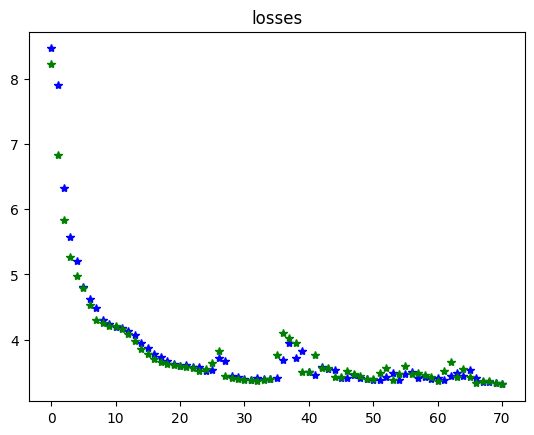

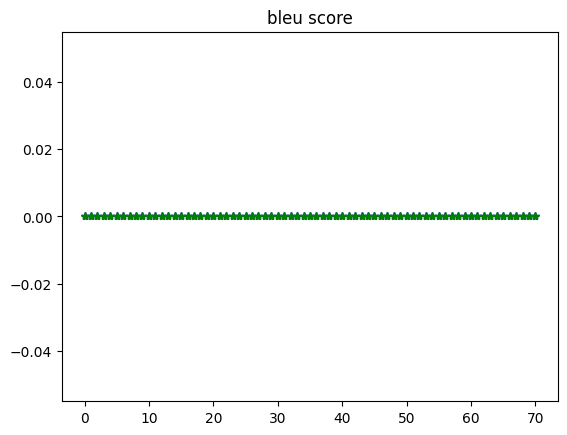

 24%|████████████████                                                    | 71/300 [08:38<28:01,  7.34s/it]

7.626455545425415
optimizing for epoch 71
training_step
0 3.270568605453249
validation_step
0 3.4399375632957176


 24%|████████████████▎                                                   | 72/300 [08:45<27:30,  7.24s/it]

6.988263368606567
optimizing for epoch 72
training_step
0 3.338152371920072
validation_step
0 3.253416455481663


 24%|████████████████▌                                                   | 73/300 [08:52<27:06,  7.17s/it]

6.997432231903076
optimizing for epoch 73
training_step
0 3.3567362940588663
validation_step
0 3.337456518365431


 25%|████████████████▊                                                   | 74/300 [08:59<26:46,  7.11s/it]

6.971886396408081
optimizing for epoch 74
training_step
0 3.3129969670222357
validation_step
0 3.244845458984375
saving for epoch 74


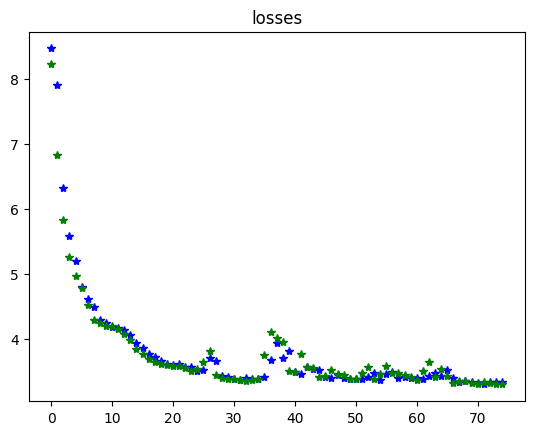

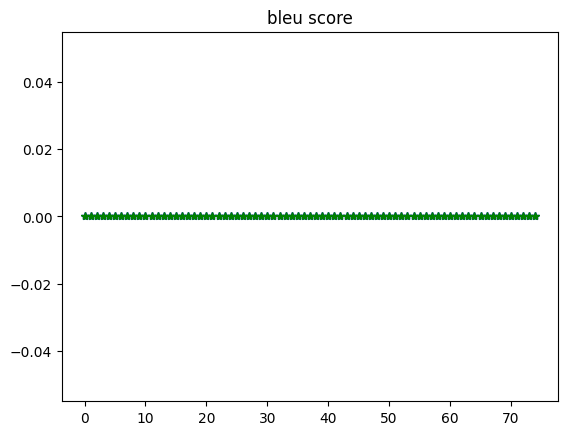

 25%|█████████████████                                                   | 75/300 [09:06<27:07,  7.23s/it]

7.519470453262329
optimizing for epoch 75
training_step
0 3.3179759676494296
validation_step
0 3.3621253380408653


 25%|█████████████████▏                                                  | 76/300 [09:13<26:46,  7.17s/it]

7.027369260787964
optimizing for epoch 76
training_step
0 3.4537064899769865
validation_step
0 3.3867771828821462


 26%|█████████████████▍                                                  | 77/300 [09:20<26:28,  7.12s/it]

7.001907110214233
optimizing for epoch 77
training_step
0 3.424815170637524
validation_step
0 3.226904732840402


 26%|█████████████████▋                                                  | 78/300 [09:27<26:14,  7.09s/it]

7.013136148452759
optimizing for epoch 78
training_step
0 3.280698450600229
validation_step
0 3.2181737263997396


 26%|█████████████████▉                                                  | 79/300 [09:34<26:03,  7.08s/it]

7.036519289016724
optimizing for epoch 79
training_step
0 3.3345438639322915
validation_step
0 3.2454328536987305


 27%|██████████████████▏                                                 | 80/300 [09:41<25:53,  7.06s/it]

7.024835109710693
optimizing for epoch 80
training_step
0 3.410948063777043
validation_step
0 3.1807721045709427
saving for epoch 80


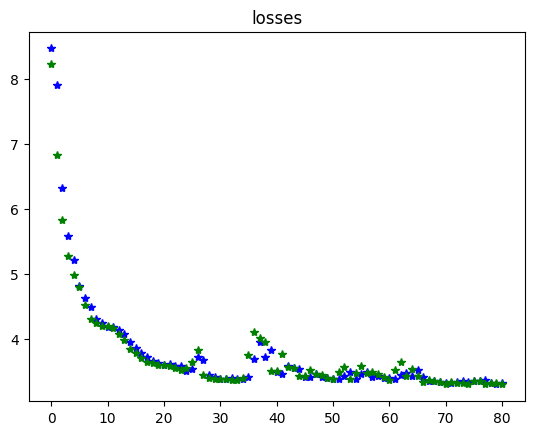

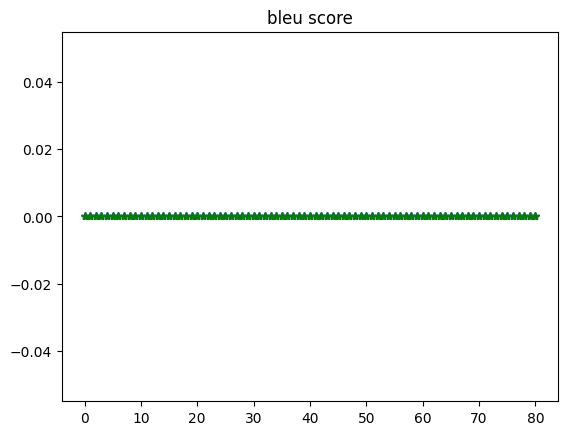

 27%|██████████████████▎                                                 | 81/300 [09:49<26:24,  7.24s/it]

7.6480796337127686
optimizing for epoch 81
training_step
0 3.2610039710998535
validation_step
0 3.513070771188447


 27%|██████████████████▌                                                 | 82/300 [09:56<26:04,  7.18s/it]

7.0300397872924805
optimizing for epoch 82
training_step
0 3.3816452026367188
validation_step
0 3.6139295789930554


 28%|██████████████████▊                                                 | 83/300 [10:03<25:43,  7.11s/it]

6.967552423477173
optimizing for epoch 83
training_step
0 3.1934022021894695
validation_step
0 3.4331159449335353


 28%|███████████████████                                                 | 84/300 [10:10<25:36,  7.11s/it]

7.101224660873413
optimizing for epoch 84
training_step
0 3.375563313190202
validation_step
0 3.3167009989420575


 28%|███████████████████▎                                                | 85/300 [10:17<25:24,  7.09s/it]

7.045290470123291
optimizing for epoch 85
training_step
0 3.228758781186996
validation_step
0 3.388216112480789


 29%|███████████████████▍                                                | 86/300 [10:24<25:12,  7.07s/it]

7.011927604675293
optimizing for epoch 86
training_step
0 3.310193115234375
validation_step
0 3.236810652936091


 29%|███████████████████▋                                                | 87/300 [10:31<25:04,  7.06s/it]

7.047510862350464
optimizing for epoch 87
training_step
0 3.4177108882933624
validation_step
0 3.435320756566806


 29%|███████████████████▉                                                | 88/300 [10:38<24:54,  7.05s/it]

7.010339260101318
optimizing for epoch 88
training_step
0 3.4711392916165864
validation_step
0 3.329399585723877


 30%|████████████████████▏                                               | 89/300 [10:45<24:46,  7.04s/it]

7.032382488250732
optimizing for epoch 89
training_step
0 3.4027371406555176
validation_step
0 3.3184020064259303


 30%|████████████████████▍                                               | 90/300 [10:52<24:40,  7.05s/it]

7.069005727767944
optimizing for epoch 90
training_step
0 3.2522981898991143
validation_step
0 3.245162010192871


 30%|████████████████████▋                                               | 91/300 [10:59<24:30,  7.04s/it]

6.998730659484863
optimizing for epoch 91
training_step
0 3.389653096672233
validation_step
0 3.170975341796875


 31%|████████████████████▊                                               | 92/300 [11:06<24:21,  7.02s/it]

6.989646673202515
optimizing for epoch 92
training_step
0 3.1899661109561013
validation_step
0 3.252658999063135


 31%|█████████████████████                                               | 93/300 [11:13<24:15,  7.03s/it]

7.050670146942139
optimizing for epoch 93
training_step
0 3.2932458893070375
validation_step
0 3.3364752492597027


 31%|█████████████████████▎                                              | 94/300 [11:20<24:06,  7.02s/it]

6.9994237422943115
optimizing for epoch 94
training_step
0 3.1946128845214843
validation_step
0 3.490320569686307


 32%|█████████████████████▌                                              | 95/300 [11:27<24:01,  7.03s/it]

7.053650617599487
optimizing for epoch 95
training_step
0 3.5066473661963617
validation_step
0 3.5290147621213026


 32%|█████████████████████▊                                              | 96/300 [11:34<23:55,  7.04s/it]

7.04330849647522
optimizing for epoch 96
training_step
0 3.30537498654343
validation_step
0 3.283570040189303


 32%|█████████████████████▉                                              | 97/300 [11:41<23:49,  7.04s/it]

7.043264150619507
optimizing for epoch 97
training_step
0 3.2963657066470287
validation_step
0 3.320361233496851


 33%|██████████████████████▏                                             | 98/300 [11:49<23:45,  7.05s/it]

7.084244012832642
optimizing for epoch 98
training_step
0 3.1934012136151715
validation_step
0 3.3254799914004196


 33%|██████████████████████▍                                             | 99/300 [11:56<23:36,  7.05s/it]

7.032423734664917
optimizing for epoch 99
training_step
0 3.1121922154580393
validation_step
0 3.1231842041015625
saving for epoch 99


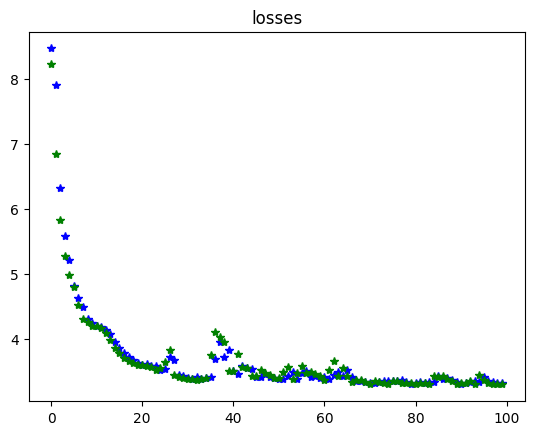

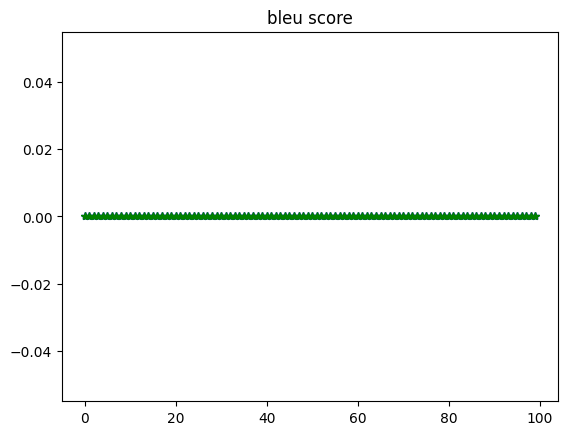

 33%|██████████████████████▎                                            | 100/300 [12:03<24:01,  7.21s/it]

7.574286699295044
optimizing for epoch 100
training_step
0 3.3717874380258412
validation_step
0 3.352064118561921


 34%|██████████████████████▌                                            | 101/300 [12:10<23:42,  7.15s/it]

7.007784843444824
optimizing for epoch 101
training_step
0 3.2735273967417635
validation_step
0 3.3471921890500993
saving for epoch 101


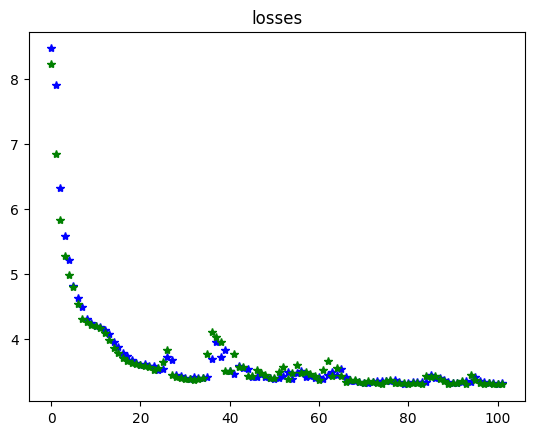

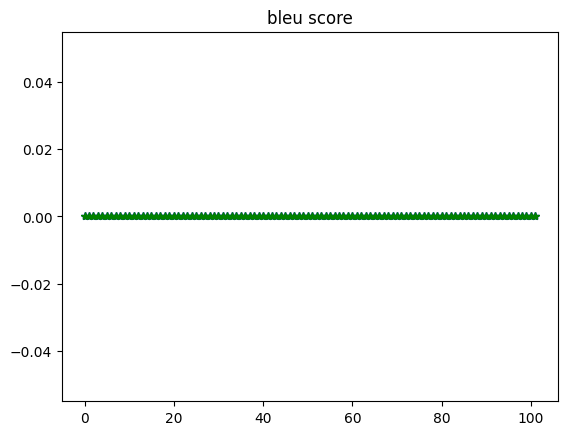

 34%|██████████████████████▊                                            | 102/300 [12:18<24:33,  7.44s/it]

8.132882833480835
optimizing for epoch 102
training_step
0 3.205719478546627
validation_step
0 3.3542546025028934


 34%|███████████████████████                                            | 103/300 [12:25<23:59,  7.31s/it]

6.980639696121216
optimizing for epoch 103
training_step
0 3.1406014864561986
validation_step
0 3.3683689662388394


 35%|███████████████████████▏                                           | 104/300 [12:32<23:36,  7.23s/it]

7.04358172416687
optimizing for epoch 104
training_step
0 3.4986745048971737
validation_step
0 3.5231032371520996


 35%|███████████████████████▍                                           | 105/300 [12:39<23:17,  7.16s/it]

7.015153169631958
optimizing for epoch 105
training_step
0 3.740555720542794
validation_step
0 3.3811003272213154


 35%|███████████████████████▋                                           | 106/300 [12:46<23:00,  7.11s/it]

6.9909889698028564
optimizing for epoch 106
training_step
0 3.4242759422019677
validation_step
0 3.520542001365719


 36%|███████████████████████▉                                           | 107/300 [12:53<22:45,  7.08s/it]

6.983232736587524
optimizing for epoch 107
training_step
0 3.328219054175205
validation_step
0 3.2660200057491178


 36%|████████████████████████                                           | 108/300 [13:00<22:34,  7.05s/it]

6.99962854385376
optimizing for epoch 108
training_step
0 3.3668395515501968
validation_step
0 3.2748984375


 36%|████████████████████████▎                                          | 109/300 [13:07<22:24,  7.04s/it]

6.996540069580078
optimizing for epoch 109
training_step
0 3.2127865650614753
validation_step
0 3.0825790014022436


 37%|████████████████████████▌                                          | 110/300 [13:14<22:17,  7.04s/it]

7.045159578323364
optimizing for epoch 110
training_step
0 3.275214059012277
validation_step
0 3.268274122668851


 37%|████████████████████████▊                                          | 111/300 [13:21<22:06,  7.02s/it]

6.963944435119629
optimizing for epoch 111
training_step
0 3.26248388671875
validation_step
0 3.1920911727413053


 37%|█████████████████████████                                          | 112/300 [13:28<21:58,  7.02s/it]

7.00701117515564
optimizing for epoch 112
training_step
0 3.2904149615575395
validation_step
0 3.260731766863567
saving for epoch 112


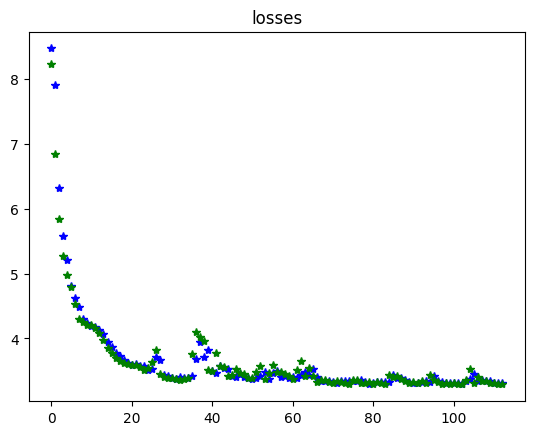

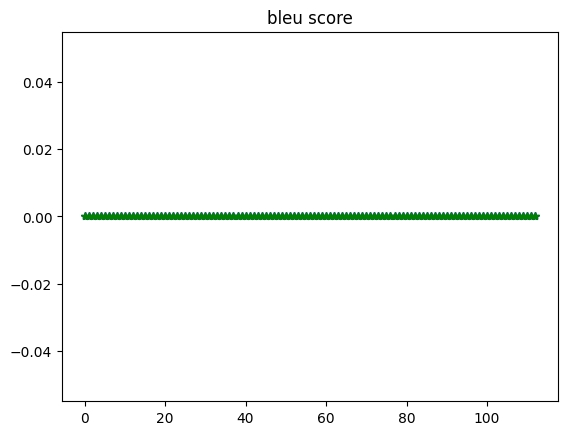

 38%|█████████████████████████▏                                         | 113/300 [13:36<22:18,  7.16s/it]

7.479505300521851
optimizing for epoch 113
training_step
0 3.344731648763021
validation_step
0 3.2748089958639706


 38%|█████████████████████████▍                                         | 114/300 [13:43<22:01,  7.11s/it]

6.9914305210113525
optimizing for epoch 114
training_step
0 3.4235628568209133
validation_step
0 3.4613594176277283


 38%|█████████████████████████▋                                         | 115/300 [13:50<21:47,  7.07s/it]

6.980933904647827
optimizing for epoch 115
training_step
0 3.4191256224654105
validation_step
0 3.431477238581731


 39%|█████████████████████████▉                                         | 116/300 [13:57<21:36,  7.04s/it]

6.982949733734131
optimizing for epoch 116
training_step
0 3.437023191523731
validation_step
0 3.503668258439249


 39%|██████████████████████████▏                                        | 117/300 [14:04<21:27,  7.04s/it]

7.009906053543091
optimizing for epoch 117
training_step
0 3.5249333068402144
validation_step
0 3.413469754732572


 39%|██████████████████████████▎                                        | 118/300 [14:11<21:20,  7.04s/it]

7.0338523387908936
optimizing for epoch 118
training_step
0 3.288155962330426
validation_step
0 3.2831130140409694


 40%|██████████████████████████▌                                        | 119/300 [14:18<21:12,  7.03s/it]

7.009382724761963
optimizing for epoch 119
training_step
0 3.218445785402313
validation_step
0 3.2407076396639387


 40%|██████████████████████████▊                                        | 120/300 [14:25<21:02,  7.01s/it]

6.978907823562622
optimizing for epoch 120
training_step
0 3.406890869140625
validation_step
0 3.2683513164520264


 40%|███████████████████████████                                        | 121/300 [14:32<20:55,  7.01s/it]

7.0117621421813965
optimizing for epoch 121
training_step
0 3.18816655476888
validation_step
0 3.277755615234375


 41%|███████████████████████████▏                                       | 122/300 [14:39<20:52,  7.03s/it]

7.076726913452148
optimizing for epoch 122
training_step
0 3.3572131440839694
validation_step
0 3.29526123046875


 41%|███████████████████████████▍                                       | 123/300 [14:46<20:45,  7.03s/it]

7.027751445770264
optimizing for epoch 123
training_step
0 3.3706087552584134
validation_step
0 3.1469801605724896


 41%|███████████████████████████▋                                       | 124/300 [14:53<20:38,  7.04s/it]

7.0420005321502686
optimizing for epoch 124
training_step
0 3.2510905111989667
validation_step
0 3.2371383785277374


 42%|███████████████████████████▉                                       | 125/300 [15:00<20:29,  7.03s/it]

7.0036234855651855
optimizing for epoch 125
training_step
0 3.244506601186899
validation_step
0 3.4593535246672453


 42%|████████████████████████████▏                                      | 126/300 [15:07<20:20,  7.01s/it]

6.973560571670532
optimizing for epoch 126
training_step
0 3.4405153189132465
validation_step
0 3.218982479436611


 42%|████████████████████████████▎                                      | 127/300 [15:14<20:11,  7.00s/it]

6.983617544174194
optimizing for epoch 127
training_step
0 3.3250609367124495
validation_step
0 3.316260060956401


 43%|████████████████████████████▌                                      | 128/300 [15:21<20:03,  7.00s/it]

6.976651906967163
optimizing for epoch 128
training_step
0 3.432231151274521
validation_step
0 3.3881870672954775


 43%|████████████████████████████▊                                      | 129/300 [15:28<19:57,  7.00s/it]

7.0145423412323
optimizing for epoch 129
training_step
0 3.336764404296875
validation_step
0 3.368696044921875


 43%|█████████████████████████████                                      | 130/300 [15:35<19:52,  7.02s/it]

7.041416883468628
optimizing for epoch 130
training_step
0 3.3618499522900764
validation_step
0 3.274332361897146


 44%|█████████████████████████████▎                                     | 131/300 [15:42<19:48,  7.03s/it]

7.062296390533447
optimizing for epoch 131
training_step
0 3.304163694381714
validation_step
0 3.326987096505572


 44%|█████████████████████████████▍                                     | 132/300 [15:49<19:40,  7.02s/it]

7.006643056869507
optimizing for epoch 132
training_step
0 3.3694526844454886
validation_step
0 3.3712844848632812


 44%|█████████████████████████████▋                                     | 133/300 [15:56<19:34,  7.03s/it]

7.050828218460083
optimizing for epoch 133
training_step
0 3.338462466285342
validation_step
0 3.3249236316215702


 45%|█████████████████████████████▉                                     | 134/300 [16:03<19:25,  7.02s/it]

6.98471736907959
optimizing for epoch 134
training_step
0 3.3478626641701528
validation_step
0 3.312316650390625


 45%|██████████████████████████████▏                                    | 135/300 [16:10<19:16,  7.01s/it]

6.978206634521484
optimizing for epoch 135
training_step
0 3.214117919921875
validation_step
0 3.33007514207883


 45%|██████████████████████████████▎                                    | 136/300 [16:17<19:07,  7.00s/it]

6.9788658618927
optimizing for epoch 136
training_step
0 3.353389964384191
validation_step
0 3.4675482473065777


 46%|██████████████████████████████▌                                    | 137/300 [16:24<18:59,  6.99s/it]

6.971519470214844
optimizing for epoch 137
training_step
0 3.40866569458969
validation_step
0 3.197200652091734


 46%|██████████████████████████████▊                                    | 138/300 [16:31<18:52,  6.99s/it]

6.978760480880737
optimizing for epoch 138
training_step
0 3.3318875145366174
validation_step
0 3.325998621662771


 46%|███████████████████████████████                                    | 139/300 [16:38<18:47,  7.00s/it]

7.026075839996338
optimizing for epoch 139
training_step
0 3.340770721435547
validation_step
0 3.4166721023676048


 47%|███████████████████████████████▎                                   | 140/300 [16:45<18:40,  7.00s/it]

7.005398750305176
optimizing for epoch 140
training_step
0 3.2092203940114667
validation_step
0 3.3665607336795693


 47%|███████████████████████████████▍                                   | 141/300 [16:52<18:31,  6.99s/it]

6.962761402130127
optimizing for epoch 141
training_step
0 3.3119121844951924
validation_step
0 3.113641357421875


 47%|███████████████████████████████▋                                   | 142/300 [16:59<18:25,  6.99s/it]

6.997575044631958
optimizing for epoch 142
training_step
0 3.417390037985409
validation_step
0 3.2650959509929627
saving for epoch 142


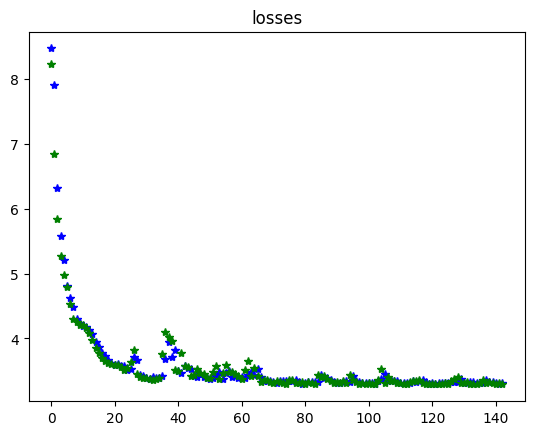

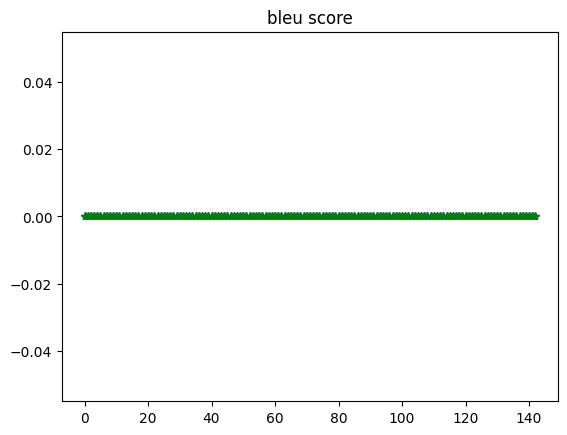

 48%|███████████████████████████████▉                                   | 143/300 [17:07<18:41,  7.14s/it]

7.490811586380005
optimizing for epoch 143
training_step
0 3.1661429056307164
validation_step
0 3.3529806426077178


 48%|████████████████████████████████▏                                  | 144/300 [17:14<18:30,  7.12s/it]

7.05203104019165
optimizing for epoch 144
training_step
0 3.2743605316662396
validation_step
0 3.426296787407562


 48%|████████████████████████████████▍                                  | 145/300 [17:21<18:18,  7.08s/it]

7.004098415374756
optimizing for epoch 145
training_step
0 3.3285813331604004
validation_step
0 3.282640380859375


 49%|████████████████████████████████▌                                  | 146/300 [17:28<18:05,  7.05s/it]

6.9732561111450195
optimizing for epoch 146
training_step
0 3.316260939378005
validation_step
0 3.473219030043658


 49%|████████████████████████████████▊                                  | 147/300 [17:35<17:57,  7.04s/it]

7.020449876785278
optimizing for epoch 147
training_step
0 3.272279800907258
validation_step
0 3.3003153800964355


 49%|█████████████████████████████████                                  | 148/300 [17:42<17:47,  7.03s/it]

6.982971906661987
optimizing for epoch 148
training_step
0 3.371111221895873
validation_step
0 3.4082162039620534


 50%|█████████████████████████████████▎                                 | 149/300 [17:49<17:38,  7.01s/it]

6.976958513259888
optimizing for epoch 149
training_step
0 3.45541311948354
validation_step
0 3.2239845150806863


 50%|█████████████████████████████████▌                                 | 150/300 [17:56<17:30,  7.00s/it]

6.984907388687134
optimizing for epoch 150
training_step
0 3.4025216509205425
validation_step
0 3.3151767578125
saving for epoch 150


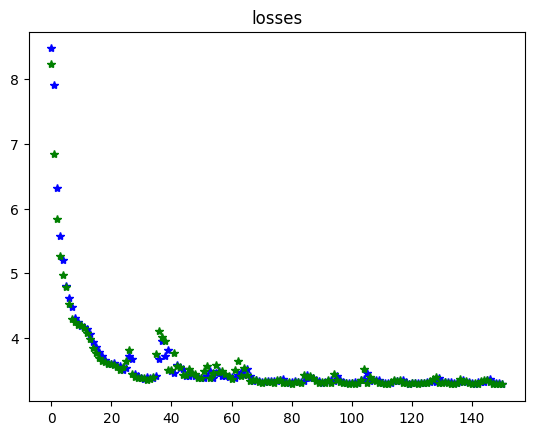

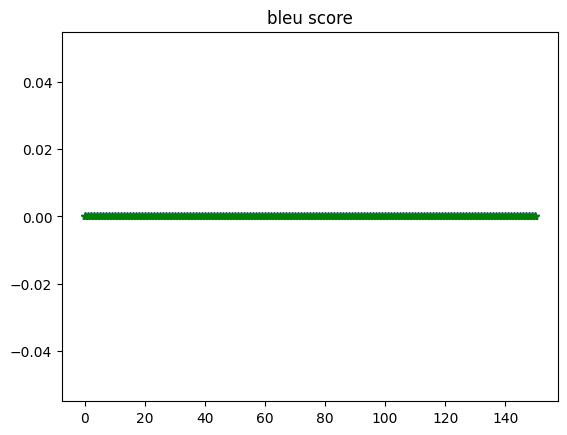

 50%|█████████████████████████████████▋                                 | 151/300 [18:03<17:52,  7.20s/it]

7.643977642059326
optimizing for epoch 151
training_step
0 3.367974609375
validation_step
0 3.2508066030649037


 51%|█████████████████████████████████▉                                 | 152/300 [18:10<17:35,  7.13s/it]

6.986201763153076
optimizing for epoch 152
training_step
0 3.2425939166356645
validation_step
0 3.2622326566972806


 51%|██████████████████████████████████▏                                | 153/300 [18:17<17:22,  7.09s/it]

6.986618518829346
optimizing for epoch 153
training_step
0 3.341828361390129
validation_step
0 3.249347717781377


 51%|██████████████████████████████████▍                                | 154/300 [18:24<17:12,  7.07s/it]

7.024272680282593
optimizing for epoch 154
training_step
0 3.18832177734375
validation_step
0 3.1755168477042774


 52%|██████████████████████████████████▌                                | 155/300 [18:31<17:02,  7.05s/it]

6.992061138153076
optimizing for epoch 155
training_step
0 3.3781125617749765
validation_step
0 3.48260498046875


 52%|██████████████████████████████████▊                                | 156/300 [18:38<16:52,  7.03s/it]

6.978993892669678
optimizing for epoch 156
training_step
0 3.274365133490444
validation_step
0 3.3368929908389138


 52%|███████████████████████████████████                                | 157/300 [18:45<16:44,  7.03s/it]

7.020749568939209
optimizing for epoch 157
training_step
0 3.473729736328125
validation_step
0 3.247697509765625


 53%|███████████████████████████████████▎                               | 158/300 [18:52<16:38,  7.03s/it]

7.029954195022583
optimizing for epoch 158
training_step
0 3.194582807339304
validation_step
0 3.421136005108173


 53%|███████████████████████████████████▌                               | 159/300 [18:59<16:29,  7.02s/it]

6.995912075042725
optimizing for epoch 159
training_step
0 3.283868687753459
validation_step
0 3.2329612610832092


 53%|███████████████████████████████████▋                               | 160/300 [19:06<16:21,  7.01s/it]

6.987042188644409
optimizing for epoch 160
training_step
0 3.1495262884324595
validation_step
0 3.266666715107267


 54%|███████████████████████████████████▉                               | 161/300 [19:13<16:15,  7.02s/it]

7.037814140319824
optimizing for epoch 161
training_step
0 3.187942626953125
validation_step
0 3.1711573446950605


 54%|████████████████████████████████████▏                              | 162/300 [19:20<16:07,  7.01s/it]

6.995115518569946
optimizing for epoch 162
training_step
0 3.479086258832146
validation_step
0 3.185084608734631


 54%|████████████████████████████████████▍                              | 163/300 [19:27<16:04,  7.04s/it]

7.1130006313323975
optimizing for epoch 163
training_step
0 3.130971358994306
validation_step
0 3.424284723878817


 55%|████████████████████████████████████▋                              | 164/300 [19:35<16:01,  7.07s/it]

7.137586832046509
optimizing for epoch 164
training_step
0 3.1815369621155756
validation_step
0 3.4506032466888428


 55%|████████████████████████████████████▊                              | 165/300 [19:42<15:52,  7.06s/it]

7.014362573623657
optimizing for epoch 165
training_step
0 3.2098495241195435
validation_step
0 3.4521330622316317


 55%|█████████████████████████████████████                              | 166/300 [19:49<15:43,  7.04s/it]

6.998888731002808
optimizing for epoch 166
training_step
0 3.2679072265625
validation_step
0 3.3553818359375


 56%|█████████████████████████████████████▎                             | 167/300 [19:56<15:35,  7.03s/it]

7.013648748397827
optimizing for epoch 167
training_step
0 3.5198597627527572
validation_step
0 3.257984102689303


 56%|█████████████████████████████████████▌                             | 168/300 [20:03<15:26,  7.02s/it]

6.989178895950317
optimizing for epoch 168
training_step
0 3.503265857696533
validation_step
0 3.1782686787266887


 56%|█████████████████████████████████████▋                             | 169/300 [20:10<15:18,  7.01s/it]

6.988877773284912
optimizing for epoch 169
training_step
0 3.378295425296754
validation_step
0 3.3296730324074075


 57%|█████████████████████████████████████▉                             | 170/300 [20:17<15:10,  7.00s/it]

6.97142219543457
optimizing for epoch 170
training_step
0 3.414736661044034
validation_step
0 3.3183707585410467


 57%|██████████████████████████████████████▏                            | 171/300 [20:24<15:02,  7.00s/it]

6.990245580673218
optimizing for epoch 171
training_step
0 3.383174866203248
validation_step
0 3.4581635651765046


 57%|██████████████████████████████████████▍                            | 172/300 [20:31<14:54,  6.99s/it]

6.968511581420898
optimizing for epoch 172
training_step
0 3.324010485001193
validation_step
0 3.419726516261245


 58%|██████████████████████████████████████▋                            | 173/300 [20:38<14:49,  7.00s/it]

7.020642995834351
optimizing for epoch 173
training_step
0 3.2914383762566617
validation_step
0 3.21887353515625


 58%|██████████████████████████████████████▊                            | 174/300 [20:45<14:44,  7.02s/it]

7.068023204803467
optimizing for epoch 174
training_step
0 3.339708270448627
validation_step
0 3.221038579940796


 58%|███████████████████████████████████████                            | 175/300 [20:52<14:37,  7.02s/it]

7.022649049758911
optimizing for epoch 175
training_step
0 3.333037391075721
validation_step
0 3.28201318359375


 59%|███████████████████████████████████████▎                           | 176/300 [20:59<14:31,  7.03s/it]

7.048848390579224
optimizing for epoch 176
training_step
0 3.3437507443311736
validation_step
0 3.433042320838341


 59%|███████████████████████████████████████▌                           | 177/300 [21:06<14:22,  7.02s/it]

6.97551965713501
optimizing for epoch 177
training_step
0 3.49265374077691
validation_step
0 3.422807048137923


 59%|███████████████████████████████████████▊                           | 178/300 [21:13<14:14,  7.00s/it]

6.975341558456421
optimizing for epoch 178
training_step
0 3.1766965312342488
validation_step
0 3.4548792763361855


 60%|███████████████████████████████████████▉                           | 179/300 [21:20<14:07,  7.01s/it]

7.007207632064819
optimizing for epoch 179
training_step
0 3.157348132524334
validation_step
0 3.2067506371474845


 60%|████████████████████████████████████████▏                          | 180/300 [21:27<14:00,  7.01s/it]

7.005089521408081
optimizing for epoch 180
training_step
0 3.265379150390625
validation_step
0 3.081393287295387


 60%|████████████████████████████████████████▍                          | 181/300 [21:36<15:27,  7.80s/it]

9.631375074386597
optimizing for epoch 181
training_step
0 3.348808750961766
validation_step
0 3.3353683948516846


 61%|████████████████████████████████████████▋                          | 182/300 [21:44<15:10,  7.72s/it]

7.525428533554077
optimizing for epoch 182
training_step
0 3.2132365685382873
validation_step
0 3.41598169127507


 61%|████████████████████████████████████████▊                          | 183/300 [21:51<15:00,  7.70s/it]

7.64712381362915
optimizing for epoch 183
training_step
0 3.4359780218368186
validation_step
0 3.4200579228291983


 61%|█████████████████████████████████████████                          | 184/300 [21:58<14:29,  7.49s/it]

7.019269704818726
optimizing for epoch 184
training_step
0 3.3278333875868054
validation_step
0 3.280615037487399


 62%|█████████████████████████████████████████▎                         | 185/300 [22:06<14:08,  7.38s/it]

7.100684404373169
optimizing for epoch 185
training_step
0 3.1685039813701925
validation_step
0 3.288639371357267


 62%|█████████████████████████████████████████▌                         | 186/300 [22:13<13:47,  7.26s/it]

6.985436916351318
optimizing for epoch 186
training_step
0 3.2348806489773883
validation_step
0 3.3605395600995944


 62%|█████████████████████████████████████████▊                         | 187/300 [22:20<13:31,  7.18s/it]

7.007208585739136
optimizing for epoch 187
training_step
0 3.235177001953125
validation_step
0 3.34423681640625


 63%|█████████████████████████████████████████▉                         | 188/300 [22:27<13:21,  7.15s/it]

7.076817512512207
optimizing for epoch 188
training_step
0 3.2423627376556396
validation_step
0 3.340393301156851


 63%|██████████████████████████████████████████▏                        | 189/300 [22:34<13:10,  7.12s/it]

7.030630111694336
optimizing for epoch 189
training_step
0 3.354589889298624
validation_step
0 3.2270525040165072


 63%|██████████████████████████████████████████▍                        | 190/300 [22:41<12:59,  7.08s/it]

7.002415418624878
optimizing for epoch 190
training_step
0 3.3458321840708494
validation_step
0 3.4506014486900844


 64%|██████████████████████████████████████████▋                        | 191/300 [22:48<12:51,  7.08s/it]

7.072180509567261
optimizing for epoch 191
training_step
0 3.3284525871276855
validation_step
0 3.3857040405273438


 64%|██████████████████████████████████████████▉                        | 192/300 [22:55<12:42,  7.06s/it]

7.019615173339844
optimizing for epoch 192
training_step
0 3.278751918247768
validation_step
0 3.156617461657915


 64%|███████████████████████████████████████████                        | 193/300 [23:02<12:35,  7.06s/it]

7.054373264312744
optimizing for epoch 193
training_step
0 3.313716827876984
validation_step
0 3.3278403282165527


 65%|███████████████████████████████████████████▎                       | 194/300 [23:09<12:26,  7.05s/it]

7.009613037109375
optimizing for epoch 194
training_step
0 3.3268376707120706
validation_step
0 3.3215893461504056


 65%|███████████████████████████████████████████▌                       | 195/300 [23:16<12:18,  7.03s/it]

6.992425441741943
optimizing for epoch 195
training_step
0 3.401633925110329
validation_step
0 3.2715723514556885


 65%|███████████████████████████████████████████▊                       | 196/300 [23:23<12:09,  7.02s/it]

6.977899074554443
optimizing for epoch 196
training_step
0 3.350392197117661
validation_step
0 3.3883209228515625


 66%|███████████████████████████████████████████▉                       | 197/300 [23:30<12:02,  7.01s/it]

7.001317262649536
optimizing for epoch 197
training_step
0 3.3394806629090796
validation_step
0 3.1523411854976366


 66%|████████████████████████████████████████████▏                      | 198/300 [23:37<11:54,  7.01s/it]

6.985401391983032
optimizing for epoch 198
training_step
0 3.266257218488558
validation_step
0 3.4510263296274037


 66%|████████████████████████████████████████████▍                      | 199/300 [23:44<11:48,  7.02s/it]

7.040858507156372
optimizing for epoch 199
training_step
0 3.329259721059648
validation_step
0 3.455180283133865


 67%|████████████████████████████████████████████▋                      | 200/300 [23:51<11:40,  7.01s/it]

6.978889226913452
optimizing for epoch 200
training_step
0 3.147727904280996
validation_step
0 3.4567461156133397


 67%|████████████████████████████████████████████▉                      | 201/300 [23:58<11:33,  7.01s/it]

7.004265785217285
optimizing for epoch 201
training_step
0 3.328882412647638
validation_step
0 3.1292104169356922


 67%|█████████████████████████████████████████████                      | 202/300 [24:05<11:27,  7.01s/it]

7.022873640060425
optimizing for epoch 202
training_step
0 3.4061341249853148
validation_step
0 3.2095438639322915
saving for epoch 202


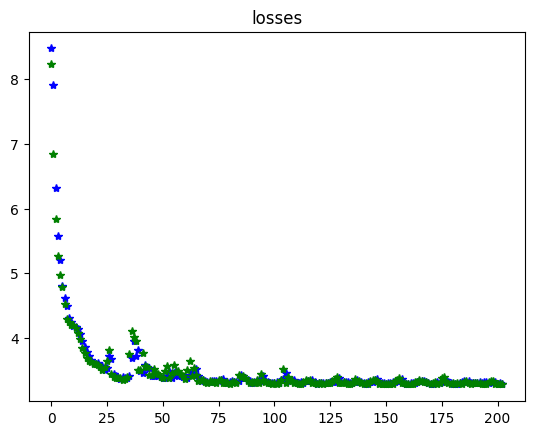

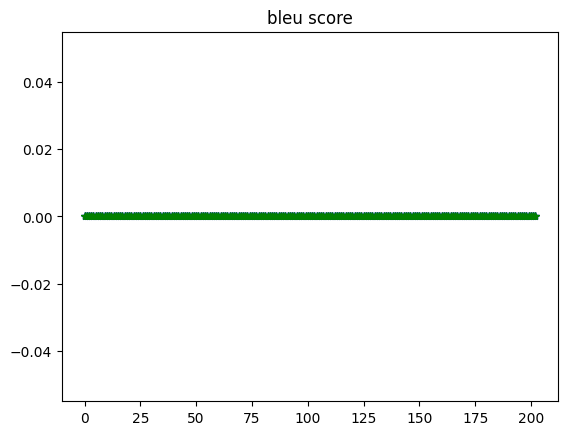

 68%|█████████████████████████████████████████████▎                     | 203/300 [24:12<11:36,  7.18s/it]

7.560362815856934
optimizing for epoch 203
training_step
0 3.2132641020275297
validation_step
0 3.370591828317353


 68%|█████████████████████████████████████████████▌                     | 204/300 [24:20<11:25,  7.14s/it]

7.047584295272827
optimizing for epoch 204
training_step
0 3.3065066230028197
validation_step
0 3.4615189401726973


 68%|█████████████████████████████████████████████▊                     | 205/300 [24:27<11:14,  7.10s/it]

6.994541645050049
optimizing for epoch 205
training_step
0 3.537857858758224
validation_step
0 3.106697523889463


 69%|██████████████████████████████████████████████                     | 206/300 [24:34<11:06,  7.09s/it]

7.0680251121521
optimizing for epoch 206
training_step
0 3.429175978440505
validation_step
0 3.365444122798859


 69%|██████████████████████████████████████████████▏                    | 207/300 [24:41<10:59,  7.09s/it]

7.0804243087768555
optimizing for epoch 207
training_step
0 3.3564085960388184
validation_step
0 3.395640696127584


 69%|██████████████████████████████████████████████▍                    | 208/300 [24:48<10:49,  7.06s/it]

7.009416818618774
optimizing for epoch 208
training_step
0 3.16474267578125
validation_step
0 3.3018128402589815


 70%|██████████████████████████████████████████████▋                    | 209/300 [24:55<10:42,  7.06s/it]

7.053259611129761
optimizing for epoch 209
training_step
0 3.309718334768701
validation_step
0 3.436803220792581


 70%|██████████████████████████████████████████████▉                    | 210/300 [25:02<10:35,  7.06s/it]

7.057031869888306
optimizing for epoch 210
training_step
0 3.2992140246975805
validation_step
0 3.3227606345349407
saving for epoch 210


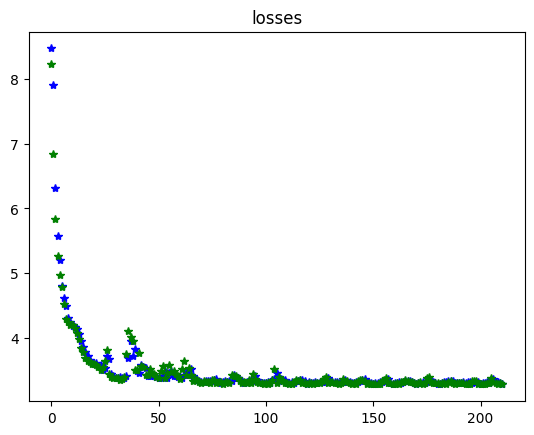

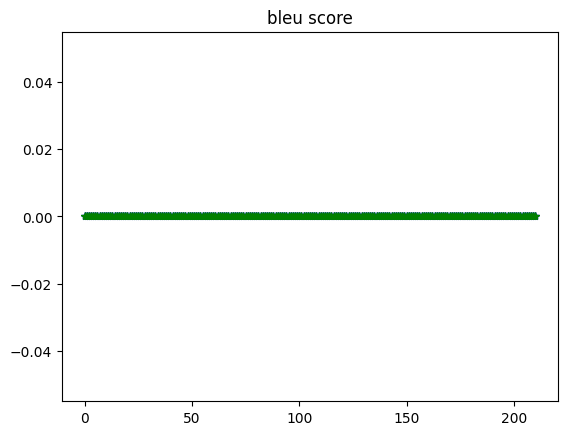

 70%|███████████████████████████████████████████████                    | 211/300 [25:09<10:42,  7.22s/it]

7.594987630844116
optimizing for epoch 211
training_step
0 3.2288803472751524
validation_step
0 3.197810791015625


 71%|███████████████████████████████████████████████▎                   | 212/300 [25:16<10:30,  7.16s/it]

7.015608787536621
optimizing for epoch 212
training_step
0 3.1388737013360033
validation_step
0 3.3158003932745883


 71%|███████████████████████████████████████████████▌                   | 213/300 [25:23<10:18,  7.11s/it]

6.991302490234375
optimizing for epoch 213
training_step
0 3.336802001953125
validation_step
0 3.2946556678185095


 71%|███████████████████████████████████████████████▊                   | 214/300 [25:30<10:08,  7.08s/it]

6.99413800239563
optimizing for epoch 214
training_step
0 3.237342529296875
validation_step
0 3.3490845651337593


 72%|████████████████████████████████████████████████                   | 215/300 [25:37<09:59,  7.05s/it]

6.98652982711792
optimizing for epoch 215
training_step
0 3.341514825820923
validation_step
0 3.2719313824763065


 72%|████████████████████████████████████████████████▏                  | 216/300 [25:44<09:51,  7.04s/it]

7.0012593269348145
optimizing for epoch 216
training_step
0 3.368262849030671
validation_step
0 3.23890283203125


 72%|████████████████████████████████████████████████▍                  | 217/300 [25:51<09:44,  7.05s/it]

7.064532995223999
optimizing for epoch 217
training_step
0 3.15876513671875
validation_step
0 3.2611687127060778


 73%|████████████████████████████████████████████████▋                  | 218/300 [25:59<09:37,  7.05s/it]

7.053192615509033
optimizing for epoch 218
training_step
0 3.3122976708599903
validation_step
0 3.33826816443241


 73%|████████████████████████████████████████████████▉                  | 219/300 [26:06<09:30,  7.05s/it]

7.048124074935913
optimizing for epoch 219
training_step
0 3.329509089543269
validation_step
0 3.381215948807566


 73%|█████████████████████████████████████████████████▏                 | 220/300 [26:13<09:23,  7.04s/it]

7.014561414718628
optimizing for epoch 220
training_step
0 3.326183755889194
validation_step
0 3.21156494140625


 74%|█████████████████████████████████████████████████▎                 | 221/300 [26:20<09:15,  7.03s/it]

7.002117156982422
optimizing for epoch 221
training_step
0 3.406493904054627
validation_step
0 3.2701851629441783


 74%|█████████████████████████████████████████████████▌                 | 222/300 [26:27<09:07,  7.02s/it]

7.0102221965789795
optimizing for epoch 222
training_step
0 3.3478368123372397
validation_step
0 3.325245534341166


 74%|█████████████████████████████████████████████████▊                 | 223/300 [26:34<09:00,  7.02s/it]

7.006359338760376
optimizing for epoch 223
training_step
0 3.239223325155615
validation_step
0 3.5447345013385054


 75%|██████████████████████████████████████████████████                 | 224/300 [26:41<08:53,  7.02s/it]

7.004035711288452
optimizing for epoch 224
training_step
0 3.4049495350230825
validation_step
0 3.4950305353986084


 75%|██████████████████████████████████████████████████▎                | 225/300 [26:48<08:46,  7.02s/it]

7.015680313110352
optimizing for epoch 225
training_step
0 3.181277367376512
validation_step
0 3.374453544616699


 75%|██████████████████████████████████████████████████▍                | 226/300 [26:55<08:39,  7.02s/it]

7.01964545249939
optimizing for epoch 226
training_step
0 3.291832708543347
validation_step
0 3.518331499242071


 76%|██████████████████████████████████████████████████▋                | 227/300 [27:02<08:32,  7.02s/it]

7.0061938762664795
optimizing for epoch 227
training_step
0 3.4963226318359375
validation_step
0 3.263636435231855


 76%|██████████████████████████████████████████████████▉                | 228/300 [27:09<08:26,  7.03s/it]

7.072776794433594
optimizing for epoch 228
training_step
0 3.3788142166738435
validation_step
0 3.4358621450570914


 76%|███████████████████████████████████████████████████▏               | 229/300 [27:16<08:19,  7.04s/it]

7.051104784011841
optimizing for epoch 229
training_step
0 3.2367568016052246
validation_step
0 3.329491376876831


 77%|███████████████████████████████████████████████████▎               | 230/300 [27:23<08:12,  7.03s/it]

7.004733562469482
optimizing for epoch 230
training_step
0 3.155020263671875
validation_step
0 3.391361976737407


 77%|███████████████████████████████████████████████████▌               | 231/300 [27:30<08:04,  7.02s/it]

6.988945245742798
optimizing for epoch 231
training_step
0 3.213018401851499
validation_step
0 3.427504652128445


 77%|███████████████████████████████████████████████████▊               | 232/300 [27:37<07:56,  7.01s/it]

7.000428199768066
optimizing for epoch 232
training_step
0 3.293681289210464
validation_step
0 3.3441200256347656


 78%|████████████████████████████████████████████████████               | 233/300 [27:44<07:50,  7.02s/it]

7.0218470096588135
optimizing for epoch 233
training_step
0 3.3217501640319824
validation_step
0 3.2914256746806796


 78%|████████████████████████████████████████████████████▎              | 234/300 [27:51<07:43,  7.02s/it]

7.0305092334747314
optimizing for epoch 234
training_step
0 3.2899732959362886
validation_step
0 3.282610885496062


 78%|████████████████████████████████████████████████████▍              | 235/300 [27:58<07:36,  7.02s/it]

7.010709285736084
optimizing for epoch 235
training_step
0 3.353616496078841
validation_step
0 3.5056036510606754


 79%|████████████████████████████████████████████████████▋              | 236/300 [28:05<07:28,  7.01s/it]

6.9962592124938965
optimizing for epoch 236
training_step
0 3.501826599566606
validation_step
0 3.418875657875119


 79%|████████████████████████████████████████████████████▉              | 237/300 [28:12<07:23,  7.03s/it]

7.083449125289917
optimizing for epoch 237
training_step
0 3.1333808273565573
validation_step
0 3.301351308822632


 79%|█████████████████████████████████████████████████████▏             | 238/300 [28:19<07:15,  7.03s/it]

7.001893043518066
optimizing for epoch 238
training_step
0 3.4744529154763293
validation_step
0 3.447728626763643


 80%|█████████████████████████████████████████████████████▍             | 239/300 [28:26<07:08,  7.02s/it]

7.015105962753296
optimizing for epoch 239
training_step
0 3.4669867865473245
validation_step
0 3.2134442667322833


 80%|█████████████████████████████████████████████████████▌             | 240/300 [28:33<07:02,  7.03s/it]

7.054602384567261
optimizing for epoch 240
training_step
0 3.2193460772114415
validation_step
0 3.2422880859375


 80%|█████████████████████████████████████████████████████▊             | 241/300 [28:40<06:55,  7.05s/it]

7.084442377090454
optimizing for epoch 241
training_step
0 3.2988978459284857
validation_step
0 3.235201396639385


 81%|██████████████████████████████████████████████████████             | 242/300 [28:47<06:48,  7.04s/it]

7.011731147766113
optimizing for epoch 242
training_step
0 3.2638379989131803
validation_step
0 3.33208642578125


 81%|██████████████████████████████████████████████████████▎            | 243/300 [28:54<06:40,  7.03s/it]

7.0014328956604
optimizing for epoch 243
training_step
0 3.3248133583674355
validation_step
0 3.303822223405193


 81%|██████████████████████████████████████████████████████▍            | 244/300 [29:01<06:32,  7.01s/it]

6.97957706451416
optimizing for epoch 244
training_step
0 3.1231299228355534
validation_step
0 3.5067406574278386


 82%|██████████████████████████████████████████████████████▋            | 245/300 [29:08<06:26,  7.02s/it]

7.026225328445435
optimizing for epoch 245
training_step
0 3.306628602923769
validation_step
0 3.3813016376798113


 82%|██████████████████████████████████████████████████████▉            | 246/300 [29:15<06:19,  7.02s/it]

7.017740726470947
optimizing for epoch 246
training_step
0 3.252580078125
validation_step
0 3.3886769230204417


 82%|███████████████████████████████████████████████████████▏           | 247/300 [29:22<06:11,  7.01s/it]

6.993757247924805
optimizing for epoch 247
training_step
0 3.2357293405840473
validation_step
0 3.323688595793968


 83%|███████████████████████████████████████████████████████▍           | 248/300 [29:29<06:04,  7.01s/it]

6.994478464126587
optimizing for epoch 248
training_step
0 3.336646501408067
validation_step
0 3.385853243949718


 83%|███████████████████████████████████████████████████████▌           | 249/300 [29:36<05:57,  7.01s/it]

7.005754232406616
optimizing for epoch 249
training_step
0 3.5101654495018115
validation_step
0 3.2727768421173096


 83%|███████████████████████████████████████████████████████▊           | 250/300 [29:43<05:50,  7.01s/it]

7.008448362350464
optimizing for epoch 250
training_step
0 3.28229248046875
validation_step
0 3.4298178307095863


 84%|████████████████████████████████████████████████████████           | 251/300 [29:50<05:43,  7.00s/it]

6.983085632324219
optimizing for epoch 251
training_step
0 3.512356744296309
validation_step
0 3.32772995355561


 84%|████████████████████████████████████████████████████████▎          | 252/300 [29:57<05:36,  7.00s/it]

7.008719205856323
optimizing for epoch 252
training_step
0 3.225407397653174
validation_step
0 3.464284114700427


 84%|████████████████████████████████████████████████████████▌          | 253/300 [30:04<05:29,  7.01s/it]

7.016057252883911
optimizing for epoch 253
training_step
0 3.370505923316592
validation_step
0 3.211529440131069


 85%|████████████████████████████████████████████████████████▋          | 254/300 [30:11<05:22,  7.01s/it]

6.9946653842926025
optimizing for epoch 254
training_step
0 3.143923828125
validation_step
0 3.038897705078125


 85%|████████████████████████████████████████████████████████▉          | 255/300 [30:18<05:15,  7.02s/it]

7.035153865814209
optimizing for epoch 255
training_step
0 3.2905719463641825
validation_step
0 3.3597565844543


 85%|█████████████████████████████████████████████████████████▏         | 256/300 [30:25<05:08,  7.02s/it]

7.019989967346191
optimizing for epoch 256
training_step
0 3.3035053453947367
validation_step
0 3.2098290228074595


 86%|█████████████████████████████████████████████████████████▍         | 257/300 [30:28<04:11,  5.84s/it]

3.0879881381988525
optimizing for epoch 257
training_step
0 3.379822470925071
validation_step
0 3.3454072265625


 86%|█████████████████████████████████████████████████████████▌         | 258/300 [30:30<03:08,  4.50s/it]

1.3608431816101074
optimizing for epoch 258
training_step
0 3.172552093257749
validation_step
0 3.3150354400882875


 86%|█████████████████████████████████████████████████████████▊         | 259/300 [30:31<02:25,  3.55s/it]

1.3475642204284668
optimizing for epoch 259
training_step
0 3.3918050895059917
validation_step
0 3.27197993351863


 87%|██████████████████████████████████████████████████████████         | 260/300 [30:32<01:55,  2.89s/it]

1.3554918766021729
optimizing for epoch 260
training_step
0 3.3184921492391557
validation_step
0 3.258517265319824


 87%|██████████████████████████████████████████████████████████▎        | 261/300 [30:34<01:34,  2.43s/it]

1.3539800643920898
optimizing for epoch 261
training_step
0 3.3348945030799277
validation_step
0 3.272923469543457


 87%|██████████████████████████████████████████████████████████▌        | 262/300 [30:35<01:20,  2.11s/it]

1.352555751800537
optimizing for epoch 262
training_step
0 3.377055691597157
validation_step
0 3.2841820532037307


 88%|██████████████████████████████████████████████████████████▋        | 263/300 [30:36<01:09,  1.88s/it]

1.34932541847229
optimizing for epoch 263
training_step
0 3.4107562029803242
validation_step
0 3.1725476477756973


 88%|██████████████████████████████████████████████████████████▉        | 264/300 [30:38<01:02,  1.72s/it]

1.350470781326294
optimizing for epoch 264
training_step
0 3.4493596356614193
validation_step
0 3.5261900930693657


 88%|███████████████████████████████████████████████████████████▏       | 265/300 [30:39<00:56,  1.61s/it]

1.3565943241119385
optimizing for epoch 265
training_step
0 3.4292484112639925
validation_step
0 3.1812723450741527


 89%|███████████████████████████████████████████████████████████▍       | 266/300 [30:41<00:52,  1.53s/it]

1.34425950050354
optimizing for epoch 266
training_step
0 3.3200702373798077
validation_step
0 3.371645779079861


 89%|███████████████████████████████████████████████████████████▋       | 267/300 [30:42<00:48,  1.48s/it]

1.3445441722869873
optimizing for epoch 267
training_step
0 3.3879559931864267
validation_step
0 3.242218017578125


 89%|███████████████████████████████████████████████████████████▊       | 268/300 [30:43<00:45,  1.44s/it]

1.3423714637756348
optimizing for epoch 268
training_step
0 3.368000542939599
validation_step
0 3.2578841920882935


 90%|████████████████████████████████████████████████████████████       | 269/300 [30:45<00:43,  1.41s/it]

1.3443467617034912
optimizing for epoch 269
training_step
0 3.1864850444178425
validation_step
0 3.3295711394279235


 90%|████████████████████████████████████████████████████████████▎      | 270/300 [30:46<00:41,  1.39s/it]

1.343818187713623
optimizing for epoch 270
training_step
0 3.236138496690124
validation_step
0 3.3792314671758397


 90%|████████████████████████████████████████████████████████████▌      | 271/300 [30:47<00:40,  1.38s/it]

1.363914966583252
optimizing for epoch 271
training_step
0 3.3112862654558315
validation_step
0 3.4595480111929087


 91%|████████████████████████████████████████████████████████████▋      | 272/300 [30:49<00:38,  1.37s/it]

1.3476629257202148
optimizing for epoch 272
training_step
0 3.179831695556641
validation_step
0 3.4121091472568796


 91%|████████████████████████████████████████████████████████████▉      | 273/300 [30:50<00:36,  1.37s/it]

1.34600830078125
optimizing for epoch 273
training_step
0 3.3193536055715462
validation_step
0 3.233114023677638


 91%|█████████████████████████████████████████████████████████████▏     | 274/300 [30:51<00:35,  1.36s/it]

1.3514337539672852
optimizing for epoch 274
training_step
0 3.1578702290852863
validation_step
0 3.1741586080411586


 92%|█████████████████████████████████████████████████████████████▍     | 275/300 [30:53<00:33,  1.36s/it]

1.3529627323150635
optimizing for epoch 275
training_step
0 3.4338397686298077
validation_step
0 3.314623735082431


 92%|█████████████████████████████████████████████████████████████▋     | 276/300 [30:54<00:32,  1.36s/it]

1.3524901866912842
optimizing for epoch 276
training_step
0 3.2627109317328986
validation_step
0 3.5103622554808624


 92%|█████████████████████████████████████████████████████████████▊     | 277/300 [30:55<00:31,  1.35s/it]

1.3430635929107666
optimizing for epoch 277
training_step
0 3.4085852989783656
validation_step
0 3.4149072265625


 93%|██████████████████████████████████████████████████████████████     | 278/300 [30:57<00:29,  1.36s/it]

1.3555271625518799
optimizing for epoch 278
training_step
0 3.245052150038422
validation_step
0 3.3101023689645235


 93%|██████████████████████████████████████████████████████████████▎    | 279/300 [30:58<00:28,  1.35s/it]

1.347980260848999
optimizing for epoch 279
training_step
0 3.321790560023991
validation_step
0 3.1930203755696613


 93%|██████████████████████████████████████████████████████████████▌    | 280/300 [30:59<00:27,  1.35s/it]

1.3549809455871582
optimizing for epoch 280
training_step
0 3.3243839176556538
validation_step
0 3.3694108569895036


 94%|██████████████████████████████████████████████████████████████▊    | 281/300 [31:01<00:25,  1.36s/it]

1.3697764873504639
optimizing for epoch 281
training_step
0 3.299311241736779
validation_step
0 3.328092098236084


 94%|██████████████████████████████████████████████████████████████▉    | 282/300 [31:02<00:24,  1.36s/it]

1.3465814590454102
optimizing for epoch 282
training_step
0 3.257907927982391
validation_step
0 3.2333814559444303


 94%|███████████████████████████████████████████████████████████████▏   | 283/300 [31:04<00:23,  1.36s/it]

1.3590176105499268
optimizing for epoch 283
training_step
0 3.33107672797309
validation_step
0 3.328716993331909


 95%|███████████████████████████████████████████████████████████████▍   | 284/300 [31:05<00:21,  1.36s/it]

1.365189552307129
optimizing for epoch 284
training_step
0 3.382305293120155
validation_step
0 3.360469102859497


 95%|███████████████████████████████████████████████████████████████▋   | 285/300 [31:06<00:20,  1.36s/it]

1.3529481887817383
optimizing for epoch 285
training_step
0 3.482033800722948
validation_step
0 3.373348659939236


 95%|███████████████████████████████████████████████████████████████▊   | 286/300 [31:08<00:19,  1.37s/it]

1.3780121803283691
optimizing for epoch 286
training_step
0 3.418390796802662
validation_step
0 3.1899452209472656


 96%|████████████████████████████████████████████████████████████████   | 287/300 [31:09<00:17,  1.37s/it]

1.3633909225463867
optimizing for epoch 287
training_step
0 3.4787744236743356
validation_step
0 3.419027328491211


 96%|████████████████████████████████████████████████████████████████▎  | 288/300 [31:10<00:16,  1.36s/it]

1.3544394969940186
optimizing for epoch 288
training_step
0 3.23683056640625
validation_step
0 3.386277488425926


 96%|████████████████████████████████████████████████████████████████▌  | 289/300 [31:12<00:14,  1.36s/it]

1.357696771621704
optimizing for epoch 289
training_step
0 3.285434783451141
validation_step
0 3.4603858540076335


 97%|████████████████████████████████████████████████████████████████▊  | 290/300 [31:13<00:13,  1.36s/it]

1.360290288925171
optimizing for epoch 290
training_step
0 3.205014228820801
validation_step
0 3.1976876258850098


 97%|████████████████████████████████████████████████████████████████▉  | 291/300 [31:14<00:12,  1.36s/it]

1.3582158088684082
optimizing for epoch 291
training_step
0 3.2097267212906506
validation_step
0 3.3867633703983193


 97%|█████████████████████████████████████████████████████████████████▏ | 292/300 [31:16<00:10,  1.36s/it]

1.357248067855835
optimizing for epoch 292
training_step
0 3.2571522105823862
validation_step
0 3.2471988336826727


 98%|█████████████████████████████████████████████████████████████████▍ | 293/300 [31:17<00:09,  1.36s/it]

1.368089199066162
optimizing for epoch 293
training_step
0 3.451266081436821
validation_step
0 3.3058371472714554


 98%|█████████████████████████████████████████████████████████████████▋ | 294/300 [31:19<00:08,  1.36s/it]

1.3577880859375
optimizing for epoch 294
training_step
0 3.368623906915838
validation_step
0 3.437038870418773


 98%|█████████████████████████████████████████████████████████████████▉ | 295/300 [31:20<00:06,  1.37s/it]

1.3717138767242432
optimizing for epoch 295
training_step
0 3.4227058582736136
validation_step
0 3.434256051332896


 99%|██████████████████████████████████████████████████████████████████ | 296/300 [31:21<00:05,  1.36s/it]

1.3595798015594482
optimizing for epoch 296
training_step
0 3.3936532088152065
validation_step
0 3.339498272378936


 99%|██████████████████████████████████████████████████████████████████▎| 297/300 [31:25<00:06,  2.00s/it]

3.497859001159668
optimizing for epoch 297
training_step
0 3.3227134527162066
validation_step
0 3.390486478805542


 99%|██████████████████████████████████████████████████████████████████▌| 298/300 [31:32<00:06,  3.47s/it]

6.8760833740234375
optimizing for epoch 298
training_step
0 3.1669215683109506
validation_step
0 3.324616417518029


100%|██████████████████████████████████████████████████████████████████▊| 299/300 [31:39<00:04,  4.49s/it]

6.871783971786499
optimizing for epoch 299
training_step
0 3.2156100233061973
validation_step
0 3.3204790654073233


100%|███████████████████████████████████████████████████████████████████| 300/300 [31:45<00:00,  6.35s/it]

6.869870185852051


In [10]:
import matplotlib.pyplot as plt

best_loss_val_mean = np.inf
best_epoch = scheduler.last_epoch

for epoch in tqdm(range(nb_epochs)):
    import time
    start = time.time()
    print(f"optimizing for epoch {epoch}")
    print("training_step")
    loss_train,nb_words_per_batch_train,metric_train = model_trainer.train_on_epoch()
    
    print("validation_step")
    loss_val,nb_words_per_batch_val,metric_val = model_trainer.validate_on_epoch()

    loss_train = np.array([float(el) for el in loss_train])
    loss_val = np.array([float(el) for el in loss_val])
    train_weights = 1/sum(nb_words_per_batch_train)
    val_weights = 1/sum(nb_words_per_batch_val)
    
    
        
    losses["train"].append(np.sum(loss_train)/sum(nb_words_per_batch_train))
    losses["val"].append(np.sum(loss_val)/sum(nb_words_per_batch_val))
    metrics["train"].append(metric_train)
    metrics["val"].append(metric_val)
    
    current_loss_val_mean = np.mean(loss_val)
    
    if (current_loss_val_mean < best_loss_val_mean):
        best_epoch = scheduler.last_epoch
        best_loss_val_mean = current_loss_val_mean

        state_dict_extended = {"model_params":model_trainer.model.state_dict(),
                               "model_inputs":model_inputs,
                              "optimizer":optimizer.state_dict(),
                              "scheduler":scheduler.state_dict(),
                              "losses":losses,
                              "metrics":metrics
                              }
        
        torch.save(state_dict_extended,path_model_and_dependencies)
        print(f"saving for epoch {epoch}")

        plt.plot(losses["train"],"b*")
        plt.plot(losses["val"],"g*")
        plt.title("losses")
        plt.show()        
        plt.figure()
        plt.plot(metrics["train"],"b*")
        plt.plot(metrics["val"],"g*")
        plt.title("bleu score")
        plt.show()
    elif epoch - best_epoch > early_stop_thresh  and early_stopping_activated:
        print("Early stopped training at epoch %d" % epoch)
        break  # terminate the training loop
    stop = time.time()
    print(stop-start)

    del loss_train,nb_words_per_batch_train,metric_train

    del loss_val,nb_words_per_batch_val,metric_val


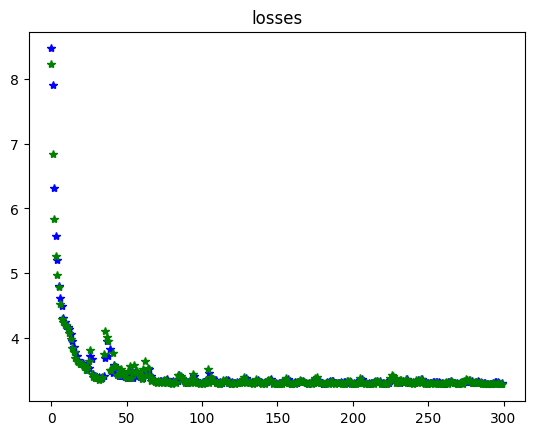

In [12]:
import matplotlib.pyplot as plt
plt.plot(losses["train"],"b*")
plt.plot(losses["val"],"g*")
plt.title("losses")
plt.show()        

In [13]:
min(losses["val"])

3.284036102294922